# ***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import  t

## ***Importing DataSet***

In [3]:
df=pd.read_excel("D://Game.xlsx")
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,16,Luis García,37,https://cdn.sofifa.org/players/4/19/16.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71,KAS Eupen,https://cdn.sofifa.org/teams/2/light/2013.png,...,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0,€1.1M
1,41,Iniesta,34,https://cdn.sofifa.org/players/4/19/41.png,Spain,https://cdn.sofifa.org/flags/45.png,86,86,Vissel Kobe,https://cdn.sofifa.org/teams/2/light/101146.png,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,€26.9M
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
3,164,G. Pinzi,37,https://cdn.sofifa.org/players/4/19/164.png,Italy,https://cdn.sofifa.org/flags/27.png,70,70,Padova,https://cdn.sofifa.org/teams/2/light/110912.png,...,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0,€372K
4,657,D. Vaughan,35,https://cdn.sofifa.org/players/4/19/657.png,Wales,https://cdn.sofifa.org/flags/50.png,66,66,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0,€263K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,246609,J. Requena,19,https://cdn.sofifa.org/players/4/19/246609.png,Argentina,https://cdn.sofifa.org/flags/52.png,57,72,Newell's Old Boys,https://cdn.sofifa.org/teams/2/light/110396.png,...,58.0,57.0,53.0,58.0,11.0,7.0,6.0,12.0,11.0,€468K
18203,246613,J. Zwarts,19,https://cdn.sofifa.org/players/4/19/246613.png,Netherlands,https://cdn.sofifa.org/flags/34.png,62,77,Feyenoord,https://cdn.sofifa.org/teams/2/light/246.png,...,51.0,18.0,22.0,17.0,8.0,12.0,8.0,7.0,6.0,€1.3M
18204,246616,José Uche,18,https://cdn.sofifa.org/players/4/19/246616.png,Spain,https://cdn.sofifa.org/flags/45.png,58,69,SD Huesca,https://cdn.sofifa.org/teams/2/light/110839.png,...,43.0,59.0,57.0,48.0,13.0,12.0,9.0,14.0,7.0,€432K
18205,246617,Javi Mier,19,https://cdn.sofifa.org/players/4/19/246617.png,Spain,https://cdn.sofifa.org/flags/45.png,62,76,Real Oviedo,https://cdn.sofifa.org/teams/2/light/110827.png,...,55.0,35.0,48.0,42.0,11.0,7.0,11.0,10.0,7.0,€1.4M


## ***Data Inspection***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [8]:
df.shape

(18207, 88)

In [10]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [12]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [14]:
df.duplicated().sum()

0

In [16]:
df.columns 

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## ***Data Cleaning***

#### converting wage dtype object to float 

In [18]:
df["Wage"]=df["Wage"].str.replace("€","")
df["Wage"]=df["Wage"].str.replace("K","").astype(float)*1000
df["Wage"]

0         6000.0
1        21000.0
2        23000.0
3         2000.0
4         4000.0
          ...   
18202     1000.0
18203     1000.0
18204     1000.0
18205     1000.0
18206     1000.0
Name: Wage, Length: 18207, dtype: float64

#### converting Height feet into inches

In [20]:
df["Height"]=df["Height"].str.split("'").str[0].fillna(0).astype(int)*12 + df["Height"].str.split("'").str[1].fillna(0).astype(int)
df.rename(columns={"Height":"Height_inches"},inplace=True)
df["Height_inches"]

0        70
1        67
2        67
3        71
4        66
         ..
18202    69
18203    73
18204    72
18205    69
18206    76
Name: Height_inches, Length: 18207, dtype: int32

#### converting Weight lbs into kg

In [22]:
df["Weight"]=df["Weight"].str.replace("lbs","").astype(float)*0.45
df["Weight"]

0        64.35
1        67.50
2        71.55
3        75.60
4        69.30
         ...  
18202    71.55
18203    73.35
18204    72.45
18205    64.35
18206    83.25
Name: Weight, Length: 18207, dtype: float64

## ***Q1 Outlier Detection for Wages***

* How can we identify outliers in the Wage column using statistical methods? Describe the steps, process, and logic behind the chosen method 
* (e.g., IQR or Z-score). What insights can be derived from these outliers regarding player valuation?

In [24]:
def outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_boundary=Q1-1.5*IQR
    Upper_boundary=Q3+1.5*IQR
    outliers=(df[column]<Lower_boundary)|(df[column]>Upper_boundary)
    return outliers
df[outliers(df, "Wage")]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,80,E. Belözoğlu,37,https://cdn.sofifa.org/players/4/19/80.png,Turkey,https://cdn.sofifa.org/flags/48.png,79,79,Medipol Başakşehir FK,https://cdn.sofifa.org/teams/2/light/101014.png,...,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M
6,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
7,2147,M. Stekelenburg,35,https://cdn.sofifa.org/players/4/19/2147.png,Netherlands,https://cdn.sofifa.org/flags/34.png,73,73,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,59.0,9.0,15.0,14.0,71.0,72.0,76.0,73.0,73.0,€1.8M
17,9014,A. Robben,34,https://cdn.sofifa.org/players/4/19/9014.png,Netherlands,https://cdn.sofifa.org/flags/34.png,84,84,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,85.0,30.0,26.0,26.0,10.0,8.0,11.0,5.0,15.0,€25.6M
43,20775,Quaresma,34,https://cdn.sofifa.org/players/4/19/20775.png,Portugal,https://cdn.sofifa.org/flags/38.png,84,84,Beşiktaş JK,https://cdn.sofifa.org/teams/2/light/327.png,...,80.0,29.0,17.0,13.0,12.0,14.0,10.0,5.0,15.0,€29.5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17168,244544,B. Alıcı,21,https://cdn.sofifa.org/players/4/19/244544.png,Turkey,https://cdn.sofifa.org/flags/48.png,73,80,Fenerbahçe SK,https://cdn.sofifa.org/teams/2/light/326.png,...,65.0,42.0,30.0,30.0,10.0,7.0,9.0,8.0,12.0,€11.6M
17567,245221,O. Abdulrahman,26,https://cdn.sofifa.org/players/4/19/245221.png,United Arab Emirates,https://cdn.sofifa.org/flags/190.png,77,78,Al Hilal,https://cdn.sofifa.org/teams/2/light/605.png,...,68.0,46.0,26.0,30.0,12.0,13.0,14.0,11.0,8.0,€18.6M
17579,245238,Javi Sánchez,21,https://cdn.sofifa.org/players/4/19/245238.png,Spain,https://cdn.sofifa.org/flags/45.png,67,79,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,55.0,64.0,67.0,65.0,11.0,15.0,13.0,8.0,13.0,€2.7M
17606,245279,Reguilón,21,https://cdn.sofifa.org/players/4/19/245279.png,Spain,https://cdn.sofifa.org/flags/45.png,68,80,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,64.0,66.0,68.0,68.0,11.0,14.0,9.0,5.0,12.0,€3.2M


In [26]:
out=df[outliers(df, "Wage")]

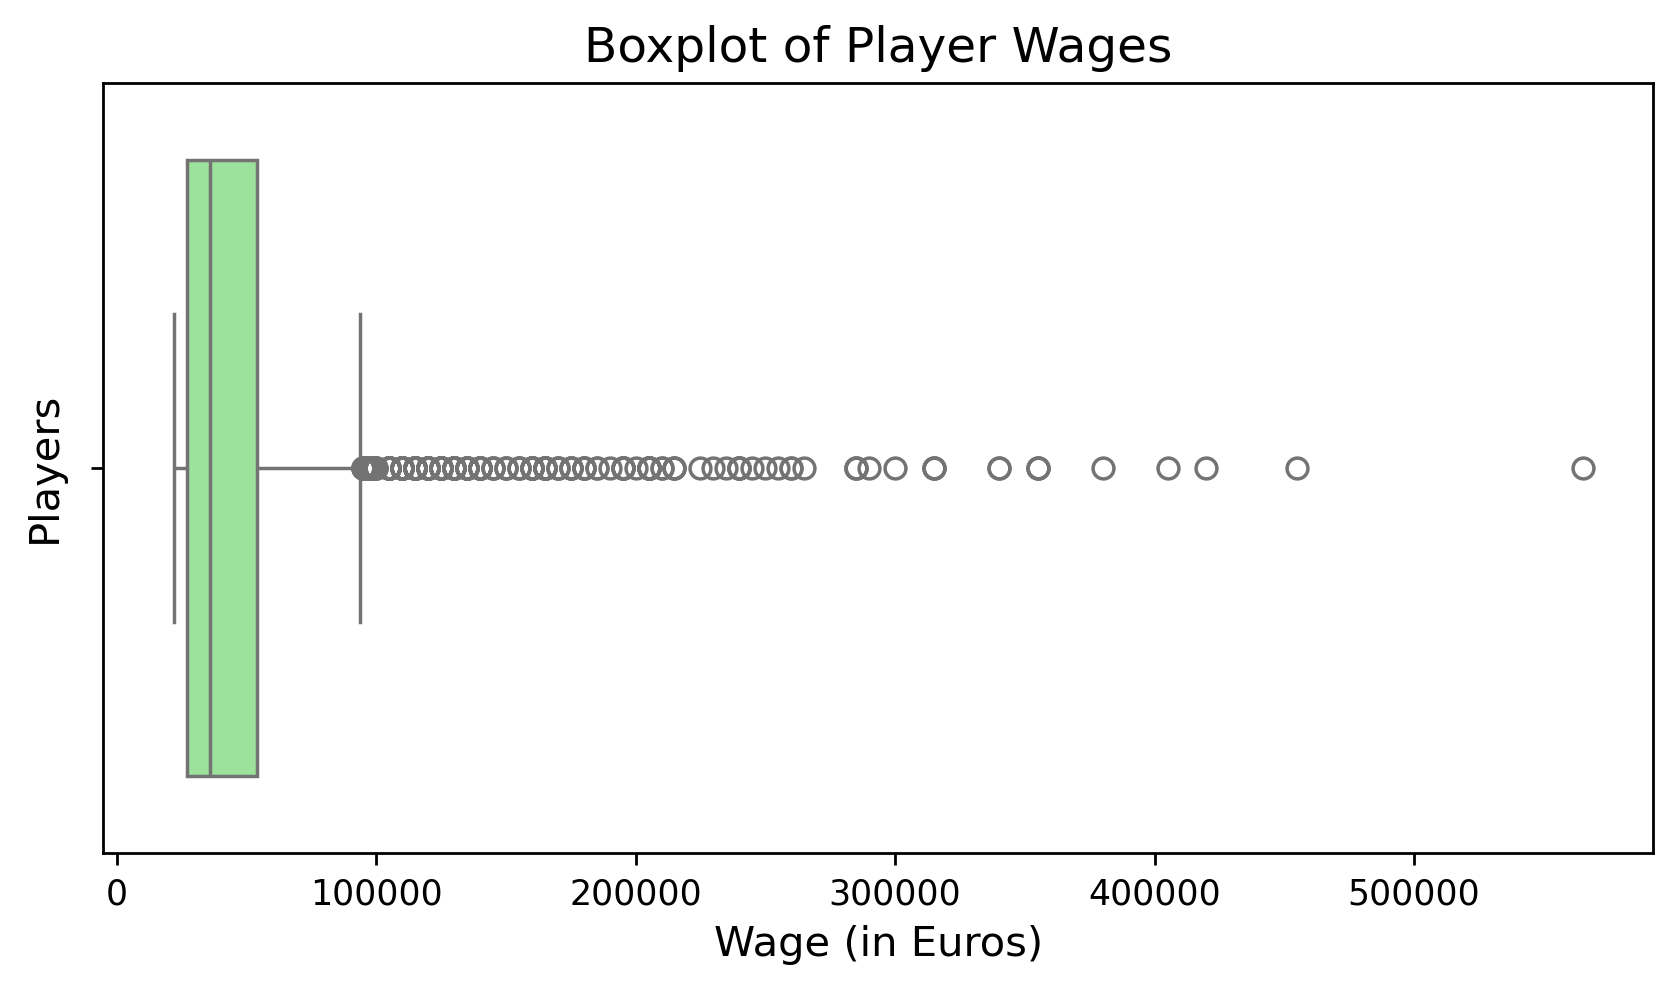

In [28]:
plt.figure(figsize=(8,4),dpi=250)
sns.boxplot(x=out["Wage"], color="lightgreen")
plt.title("Boxplot of Player Wages", fontsize=14)
plt.xlabel("Wage (in Euros)", fontsize=12)
plt.ylabel("Players", fontsize=12)
plt.show()

*From this visualisation we comes to known that most of the players wages are between approximately 140000 and 210000 there are few highly paid outliers with wages up to around 500000.

## ***Q2 Distribution Analysis of Potential.***
* What is the distribution of the Potential column? Is it normal, skewed, or multimodal? Visualize and describe the distribution, and fit a theoretical distribution (e.g., normal) to assess its fit.

In [10]:
potential = df["Potential"]
skewness  = df["Potential"].skew()    
kurtosis  = df["Potential"].kurt()  
skewness , kurtosis

(0.2661535963828859, 0.03582580838729976)

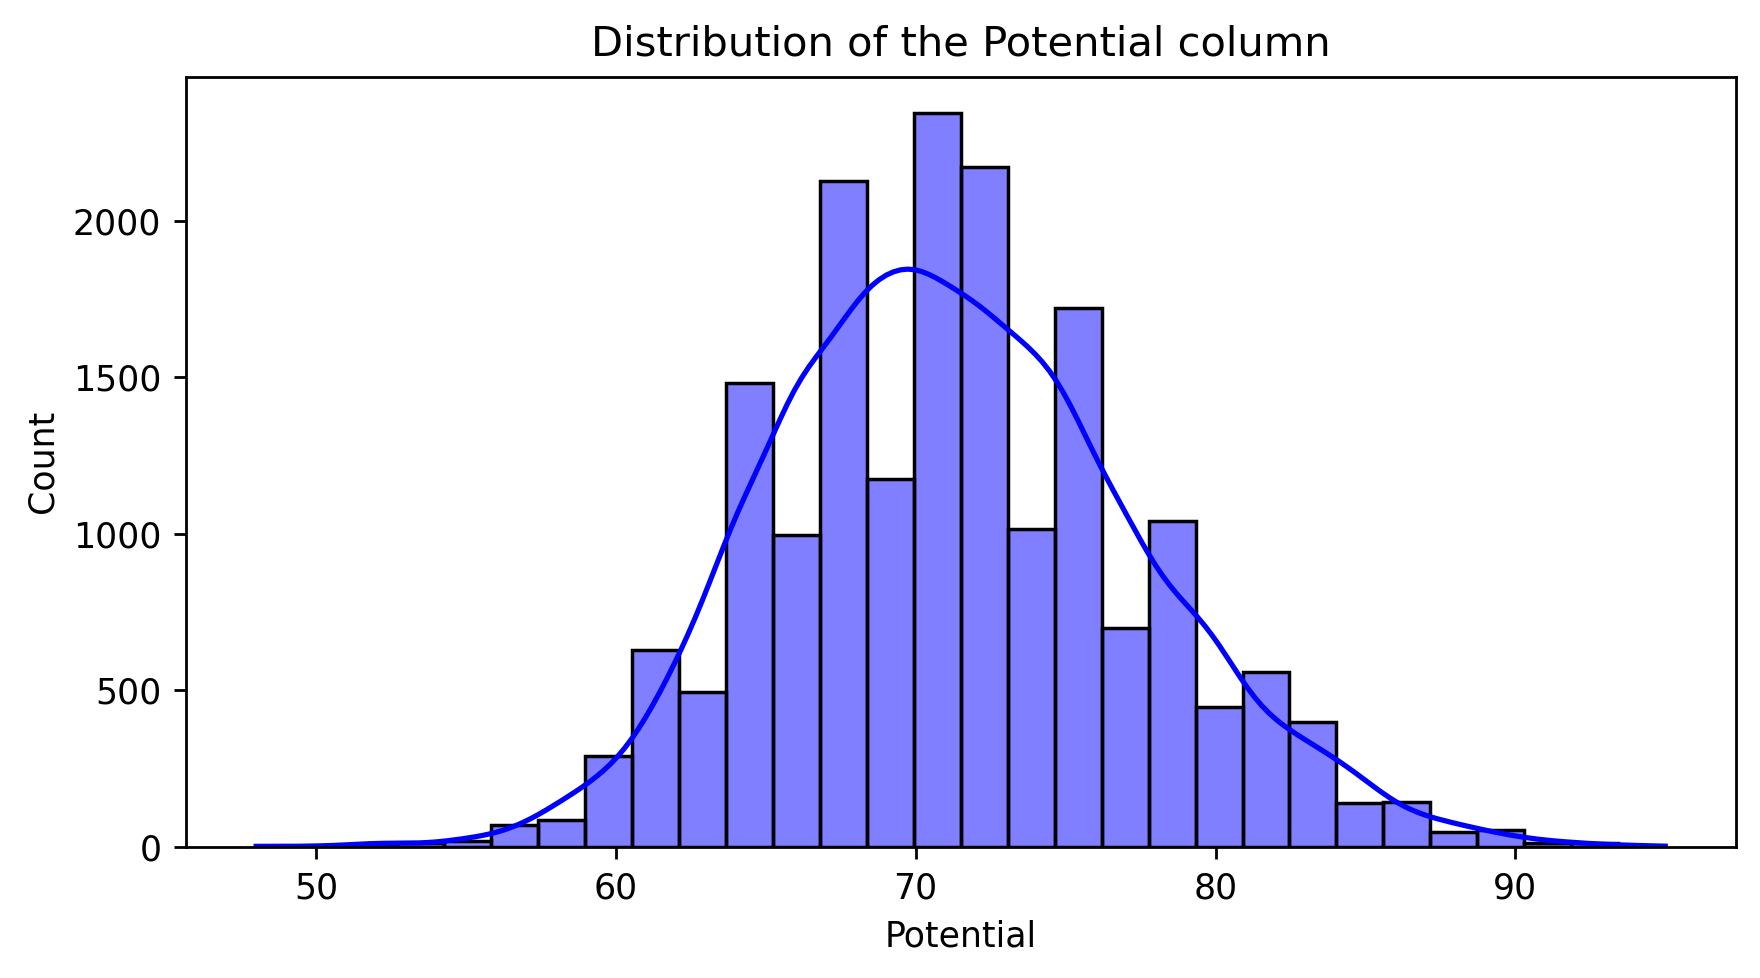

In [11]:
plt.figure(figsize=(8,4),dpi=250)
sns.histplot(potential,bins=30,kde=True,color="blue")
plt.title("Distribution of the Potential column")
plt.show()

#### Fitting a Normal Distribution

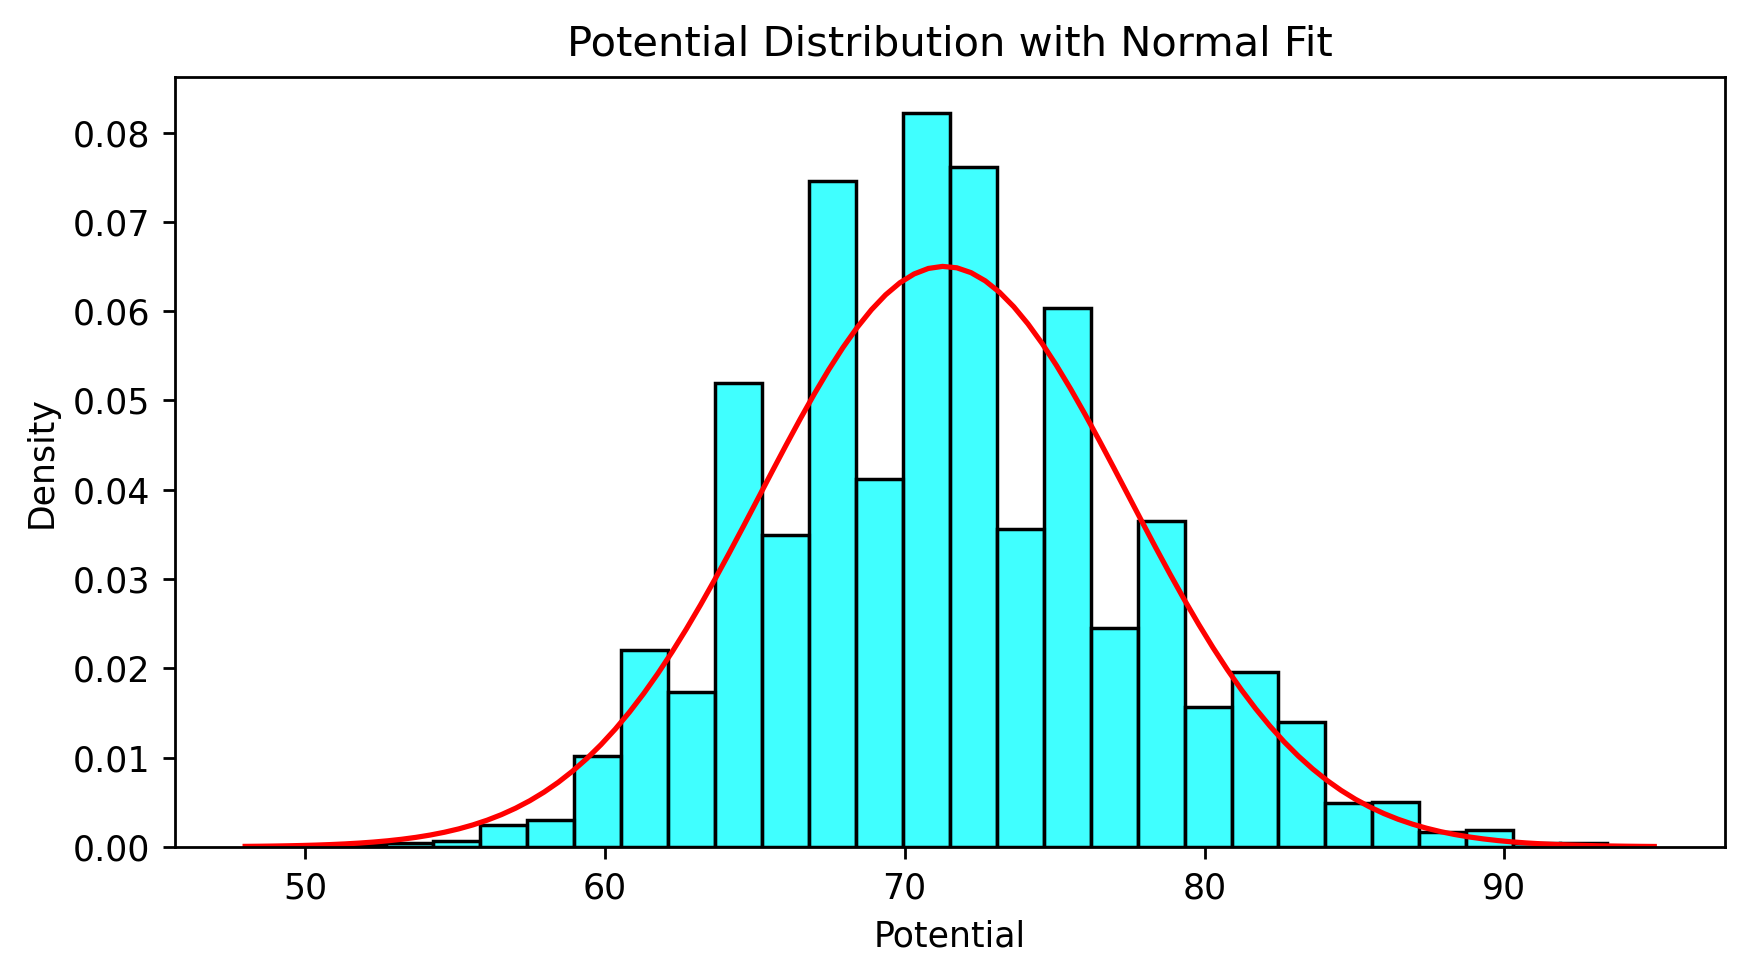

In [12]:
mean = np.mean(potential)
std = np.std(potential)
plt.figure(figsize=(8,4),dpi=250)
sns.histplot(potential, bins=30,stat="density", color="cyan")#This creates a smooth curve that represents the probability density function of a continuous variable. 
x = np.linspace(min(potential), max(potential), 100)#It creates numbers with equal linear spacing between the start and end points.
y = norm.pdf(x, mean, std)#describes the likelihood of a continuous random variable falling within a specific range of values
plt.plot(x, y, color="red")
plt.title("Potential Distribution with Normal Fit")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.show()

## ***Q3 Normal vs. Student’s t-Distribution***
* Compare the Normal and Student’s t-distributions using the Potential column. Explain the theoretical differences between these distributions and illustrate how they apply to the Potential data. What implications do these differences have for small sample sizes?


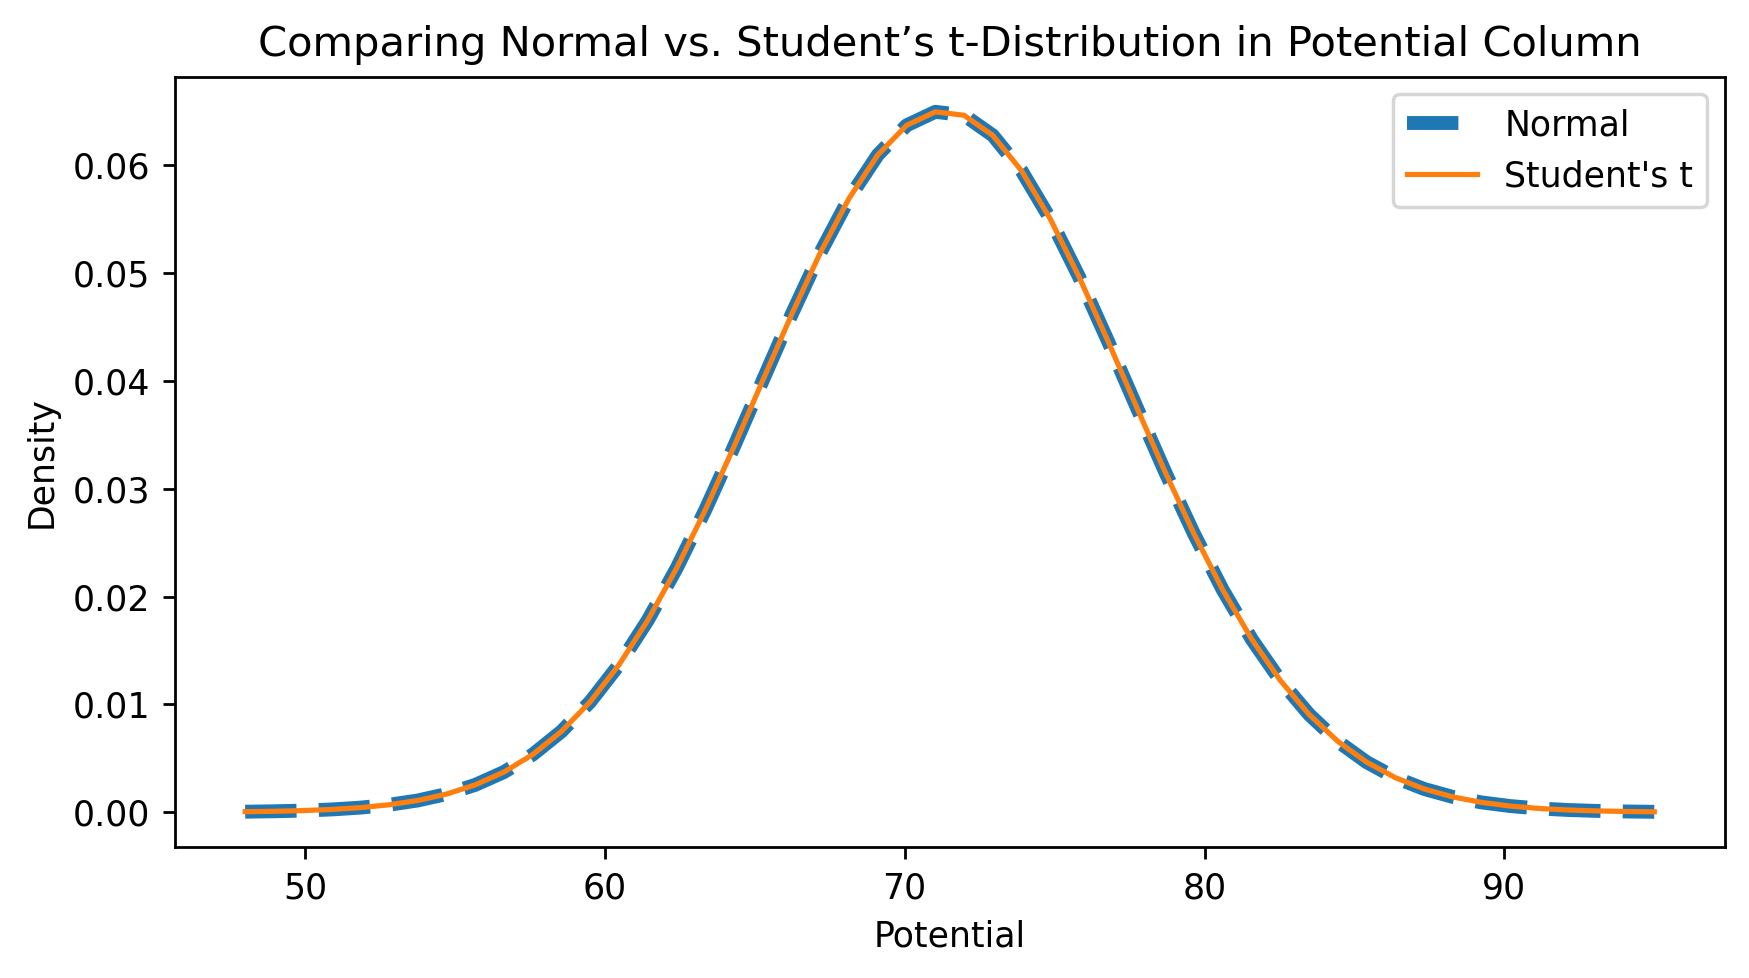

In [13]:
x = np.linspace(df["Potential"].min(), df["Potential"].max())     
plt.figure(figsize=(8,4),dpi=250)   
plt.plot(x,stats.norm.pdf(x, mean, std),label="Normal",linewidth=4,linestyle="--")
plt.plot(x, stats.t.pdf(x, df=len(df["Potential"])-1, loc=df["Potential"].mean(), scale=df["Potential"].std()), label="Student's t")
#It helps you plot the shape of the t-distribution curve for comparison with a normal distribution.
#The degree of freedom (df) controls the shape of the t-distribution.
#As df increases (larger sample), the t-distribution curve becomes closer to the normal curve.
plt.title("Comparing Normal vs. Student’s t-Distribution in Potential Column")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()
plt.show()

* The this plot We are comparing Normal and Student t- distributon fit the potential colunm in our dataset.As we can see the two curves normal in blue and t- distribution in orange, this means that is data is normal and has large sample size that both distrinution is overlapping .The symmetry of the distribution shows that there is no skeweness in the data and the peak at around 70 indicates the average potential value.

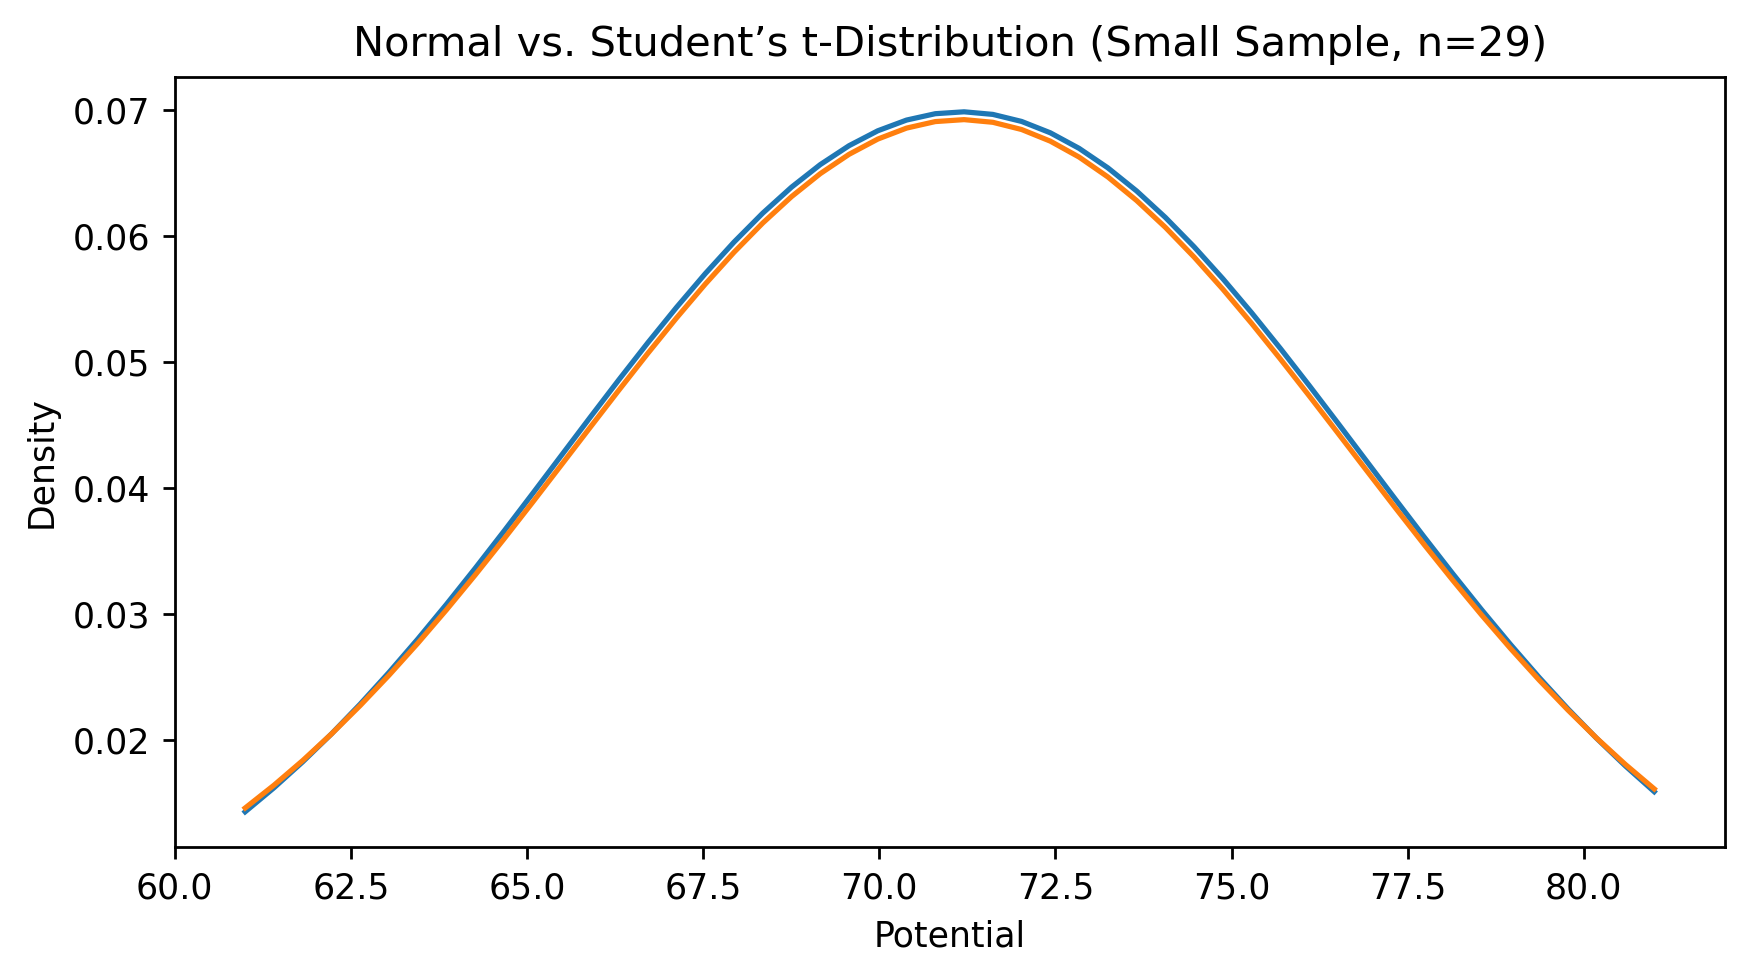

In [10]:
## taking small sample
sample = df["Potential"].sample(n=29)
## Compute sample mean and std
mean = sample.mean()
std = sample.std()
#x-values range
x = np.linspace(sample.min(), sample.max())
# plot both distributions
plt.figure(figsize=(8,4), dpi=250)
plt.plot(x, stats.norm.pdf(x, mean, std), label="Normal")#, linestyle="--", linewidth=3)
plt.plot(x, stats.t.pdf(x, df=len(sample)-1, loc=mean, scale=std), label="Student t-test")
plt.title("Normal vs. Student’s t-Distribution (Small Sample, n=29)")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.show()

As, we can see due to large sample size both distribution is overlapping . So, here i have take small sample i.e 29 then my degreee of freedom will be 28. While both graph follows bell shaped curve the student t distribution is slightly flatter and have heavier tail this means it accounts for more variability in the data. That is why is statistics we often use t distribution instead of normal when the sample size is below 30 or population variance is unknown.However, we can also see that even with 29 sample the difference between the 2 distrubution is already quite small.

## ***Q4 Normal vs. Standard Normal Distribution***
* Explain the difference between a normal distribution and a standard normal distribution using the Potential column. Standardize the Potential data and compare it to the standard normal distribution. How does this transformation aid in statistical analysis?

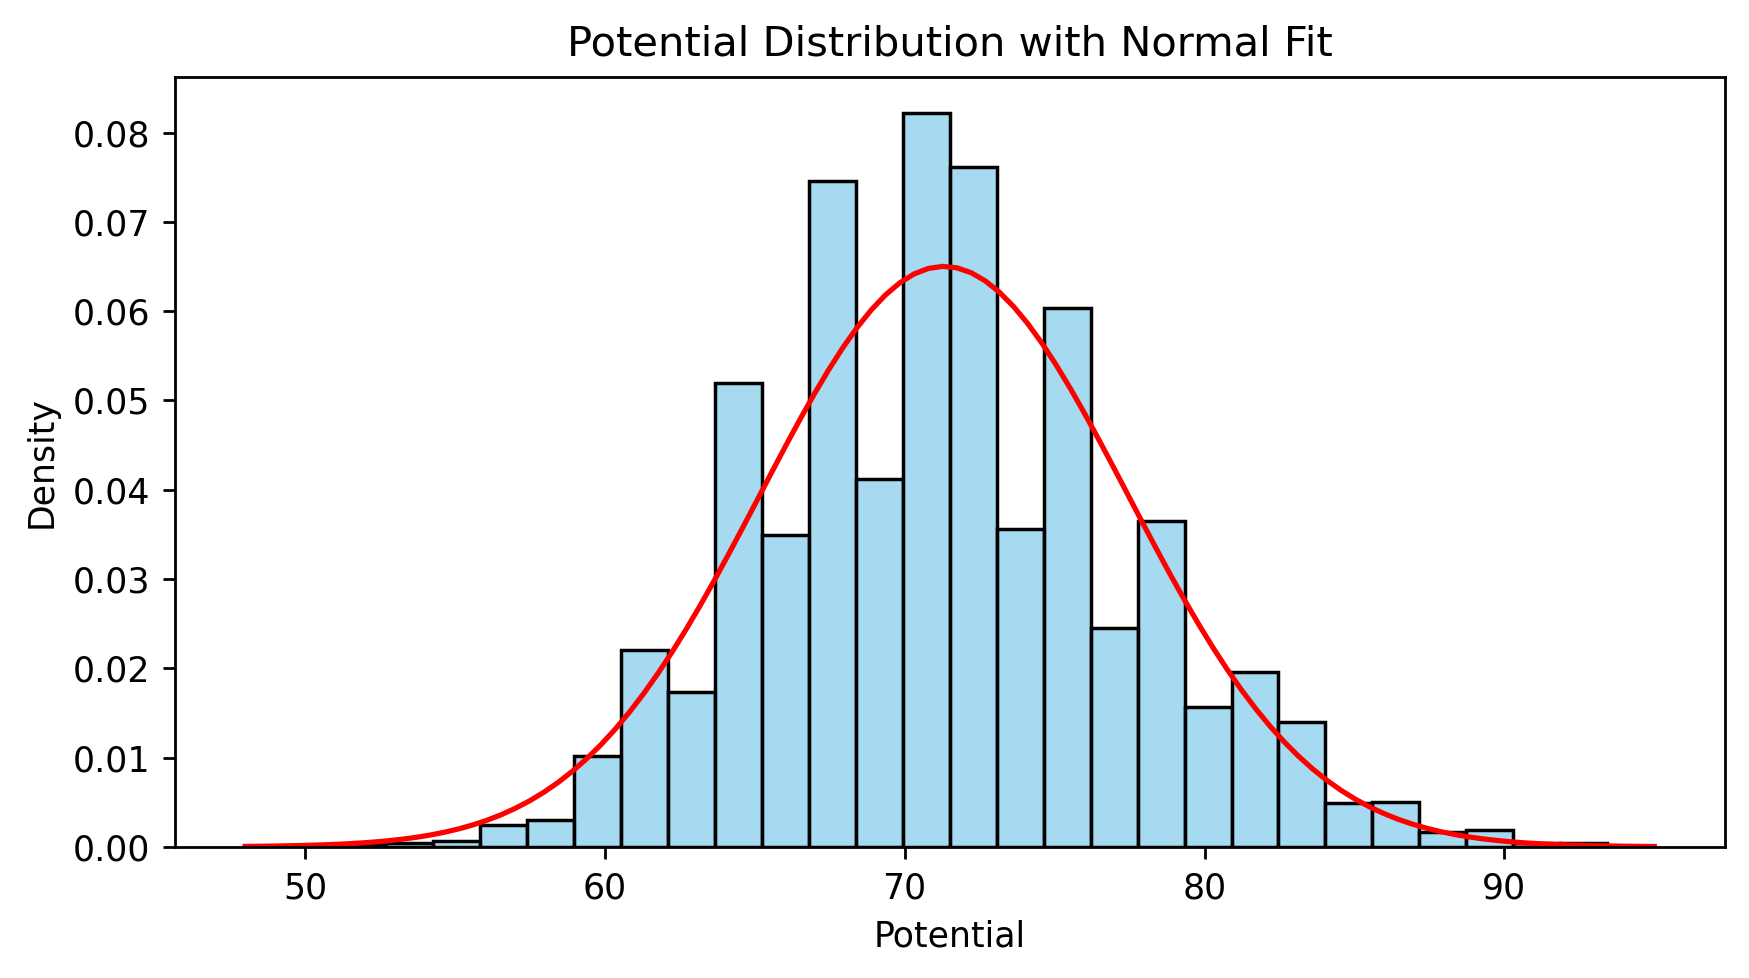

In [25]:
mean = np.mean(potential)
std = np.std(potential)
plt.figure(figsize=(8,4),dpi=250)
sns.histplot(potential, bins=30, stat="density", color="skyblue")
x = np.linspace(min(potential), max(potential), 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, color="red")
plt.title("Potential Distribution with Normal Fit")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.show()

* Here in the 1 st plot the blue histogram shows original data fitted into normal with a curve in red. The data is centered around 70 and roughly follows a bell shape which indicates its approximately normal. 

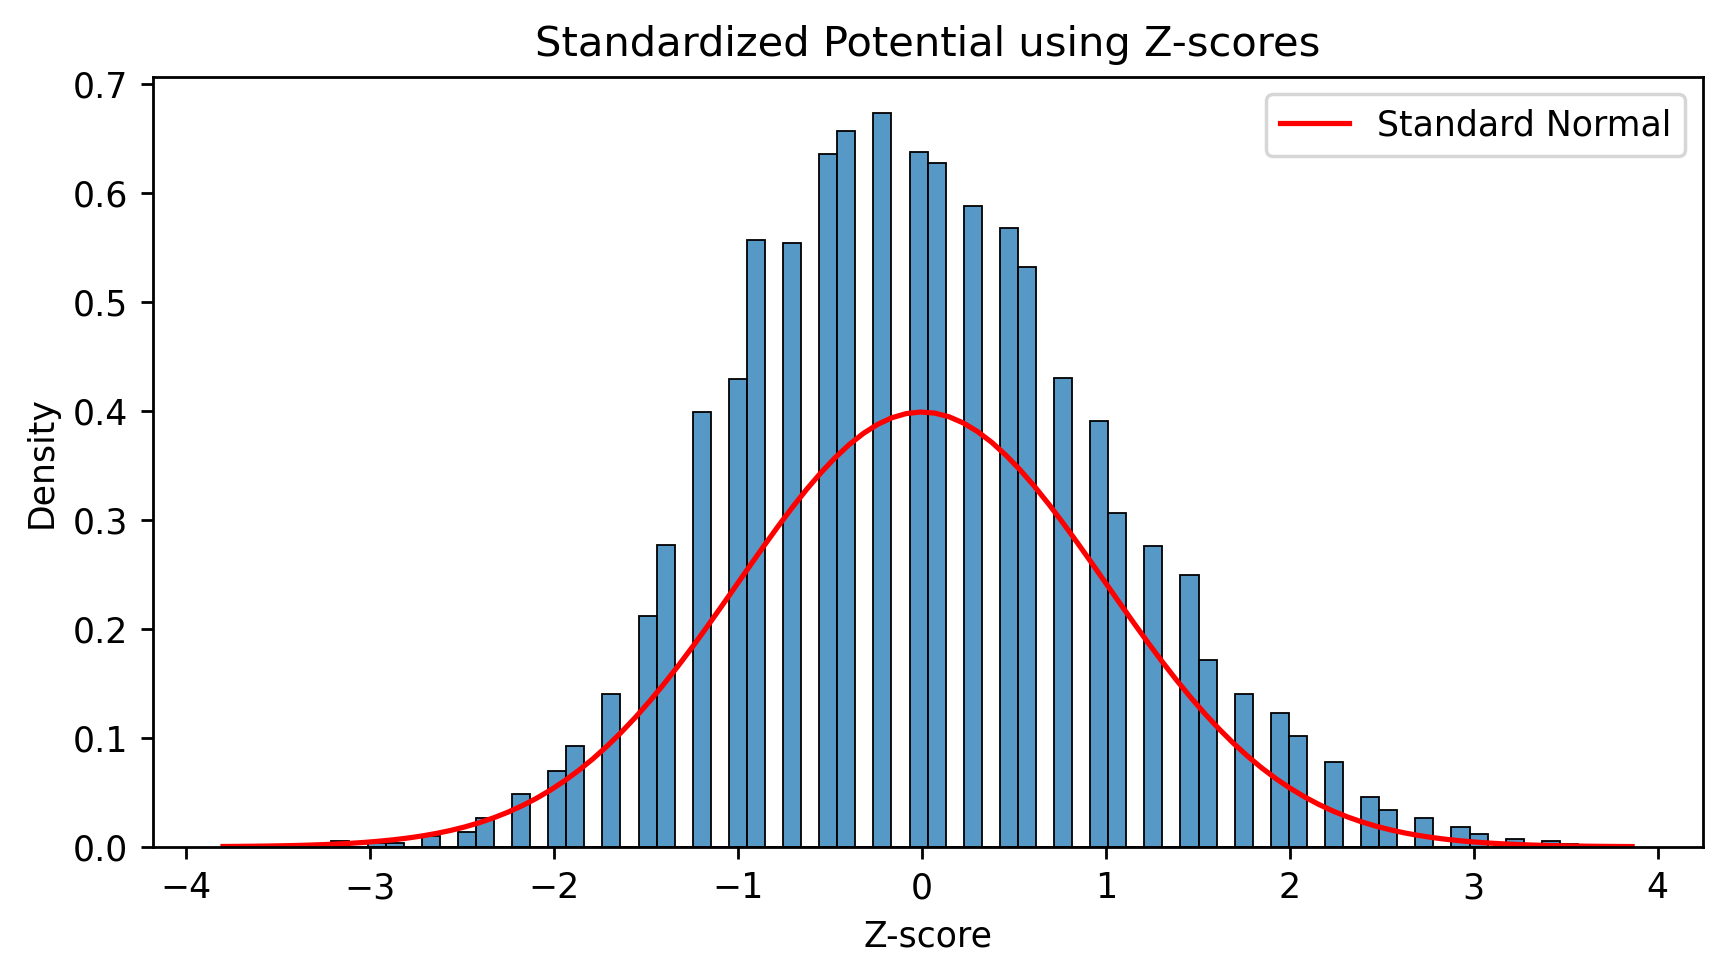

In [27]:
plt.figure(figsize=(8,4),dpi=250)
p_mean=df["Potential"].mean()
p_std=df["Potential"].std()
z_score=(potential-p_mean)/p_std
sns.histplot(z_score,stat="density")
x = np.linspace(z_score.min(),z_score.max(), 100) 
plt.plot(x, stats.norm.pdf(x), color="red",label="Standard Normal")
plt.title("Standardized Potential using Z-scores")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()

* In the 2 nd plot We've standardized these value by using z score means we have rescaled the original value of potential colunm so that mean becomes 0 and standard deviation becomes 1 . The resulting shape aligns perfectly with teh standard normal curve confirming that our data behave normal after stadardization.

## Q5 Confidence Intervals for Potential, Wage, and Weight
* Calculate the 90%, 95%, and 99% confidence intervals for the mean of the Potential, Wage, and Weight columns. What do these intervals indicate about the population parameters, and how does the confidence level affect the interval width?


In [ ]:
def calculate_ci(column, conf_level):
    mean = df[column].mean()
    std = df[column].std()
    n = len(df)
    z = stats.norm.ppf(1 - (1 - conf_level)/2)
    se = std / np.sqrt(n)
    lower, upper = mean - z * se, mean + z * se
    return lower, upper
for col in ['Potential', 'Wage', 'Weight']:
        print(f"{col} CI:")
        print("90%:", calculate_ci(col, 0.9))
        print("95%:", calculate_ci(col, 0.95))
        print("99%:", calculate_ci(col, 0.99))

*Functions in Python encapsulate reusable code. Here, it makes the CI calculation modular, so we can call it multiple times for different columns and levels without repetition. This promotes DRY (Don't Repeat Yourself) principles.
df[column] selects the column as a Pandas Series. .mean() computes the arithmetic mean (sum of values divided by count). This is the point estimate for the population mean. For example, if the column is 'Potential', it might return 71.2. Skips NaN values by default.
.std() computes the spread of data (square root of variance). Uses Bessel's correction (divides by n-1) for sample std. Essential for estimating variability, which affects the CI width. For skewed data like 'Wage', std will be high.
len(df) returns the total rows (18,207), assuming no filtering. This is the sample size (n), crucial for the standard error. Note: It uses the full DataFrame length, assuming no NaNs or that they're handled; in practice, use df[column].count() for non-NaN count.
stats.norm.ppf is the percent point function (inverse CDF) from SciPy. The formula 1 - (1 - conf_level)/2 gives the upper tail probability (e.g., for 0.95, it's 0.975). This returns the Z-value where the cumulative probability is 0.975 (1.96). Based on the normal distribution assumption via CLT. Higher conf_level → larger z.
                                                                                                                                            np.sqrt(n) computes the square root of the sample size using NumPy. SE = std / √n estimates the standard deviation of the sampling distribution of the mean. As n increases, SE decreases, making estimates more precise (CLT in action).
 The margin of error is z * se. Subtracting/additing it to the mean gives the interval. Symmetric due to normal approximation. Returns a tuple (lower, upper).
 Ends the function, passing results back to the caller. Allows printing or further use.
 A for loop for repetition. Applies the function to multiple columns efficiently.
Uses an f-string (formatted string literal) for dynamic insertion of col. Improves readability.
calculate_ci(col, 0.9) invokes the function. print outputs to console. Tuple prints as (lower, upper).
Repeats the call with a higher level, showing wider interval.
Final call, widest interval. Demonstrates how confidence level affects width.*

## Q6 Validation of the Central Limit Theorem
* Demonstrate the Central Limit Theorem using the Potential column. How does the distribution of sample means behave as sample size increases? Provide visualizations to support the analysis and explain the implications of the CLT for statistical inference.

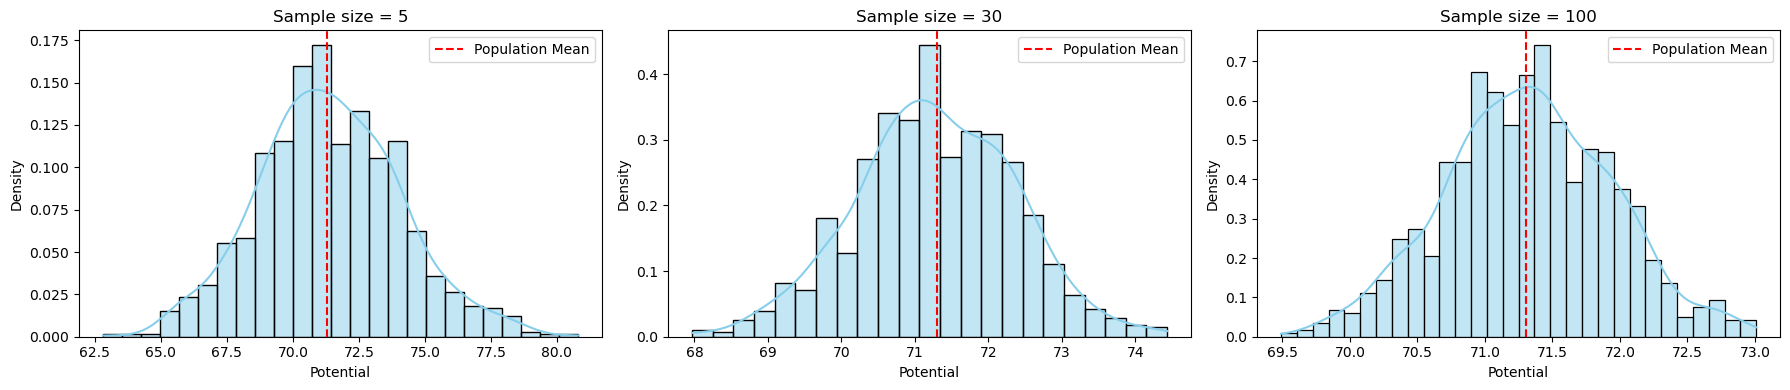

In [29]:
sample1 = [df["Potential"].sample(n=5,replace=True).mean() for i in range(1000)]
sample2 = [df["Potential"].sample(n=30,replace=True).mean() for i in range(1000)]
sample3 = [df["Potential"].sample(n=100,replace=True).mean() for i in range(1000)]


plt.figure(figsize=(18,4))
# Sample size 5
plt.subplot(1, 3, 1)
sns.histplot(sample1,kde=True, stat="density",color="skyblue")
plt.axvline(np.mean(potential), color="red", linestyle="--", label="Population Mean")
plt.title("Sample size = 5")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()

# Sample size 30
plt.subplot(1, 3, 2)
sns.histplot(sample2,kde=True, stat="density", color="skyblue")
plt.axvline(np.mean(potential), color="red", linestyle="--", label="Population Mean")
plt.title("Sample size = 30")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()

# Sample size 100
plt.subplot(1, 3, 3)
sns.histplot(sample3,kde=True, bins=30, stat="density", color="skyblue")
plt.axvline(np.mean(potential), color="red", linestyle="--", label="Population Mean")
plt.title("Sample size = 100")
plt.xlabel("Potential")
plt.ylabel("Density")
plt.legend()
plt.show()


* Each histogram shows the distribution of sample mean with vertical line representing the population mean. In left graph with the sample size 5 the distribution of the sample mean is wider and indicating greater variance or spread of the data. In middle grapgh with sample size 30 the distribution of sample mean becomes narrower and more clustered around population mean showing less variance. In right graph  the sample size is 100  the distribution is even narrower and more closely centered on the population mean demonstrating the lowest variance amongs the  3 graph. This series  of the graph illustrate the center limit theorem which standa that as the sample size increases, the sample distribution od mean will become more normal. 

## Q7 Correlation Analysis: Potential and Wage
* Is there a significant correlation between Potential and Wage? Use statistical measures (e.g., Pearson correlation) and visualizations to explore this relationship. What does this imply about player valuation in the football market?

In [16]:
# Calculating Covariance
covXY = np.sum(( df["Potential"]- np.mean(df["Potential"])) * (df["Wage"] - np.mean(df["Wage"]))) / (len(df["Potential"]) - 1)
print("Covariance between Potential(X) and Wage(Y):",covXY)
# Calculating Correlation
stdx=np.sqrt(np.sum((df["Potential"]- np.mean(df["Potential"]))**2)/len(df["Potential"])-1)
stdy=np.sqrt(np.sum((df["Wage"] - np.mean(df["Wage"]))**2)/len(df["Wage"])-1)
r= covXY/(stdx*stdy)
print("Correlation between Potential and Wage Colunm is :",r)

Covariance between Potential(X) and Wage(Y): 65567.53774743312
Correlation between Potential and Wage Colunm is : 0.4929457921031621


In [50]:
P_w=df[["Potential","Wage"]]
corr=P_w.corr()
corr

,Potential,Wage
Potential,1.000000,0.488808
Wage,0.488808,1.000000


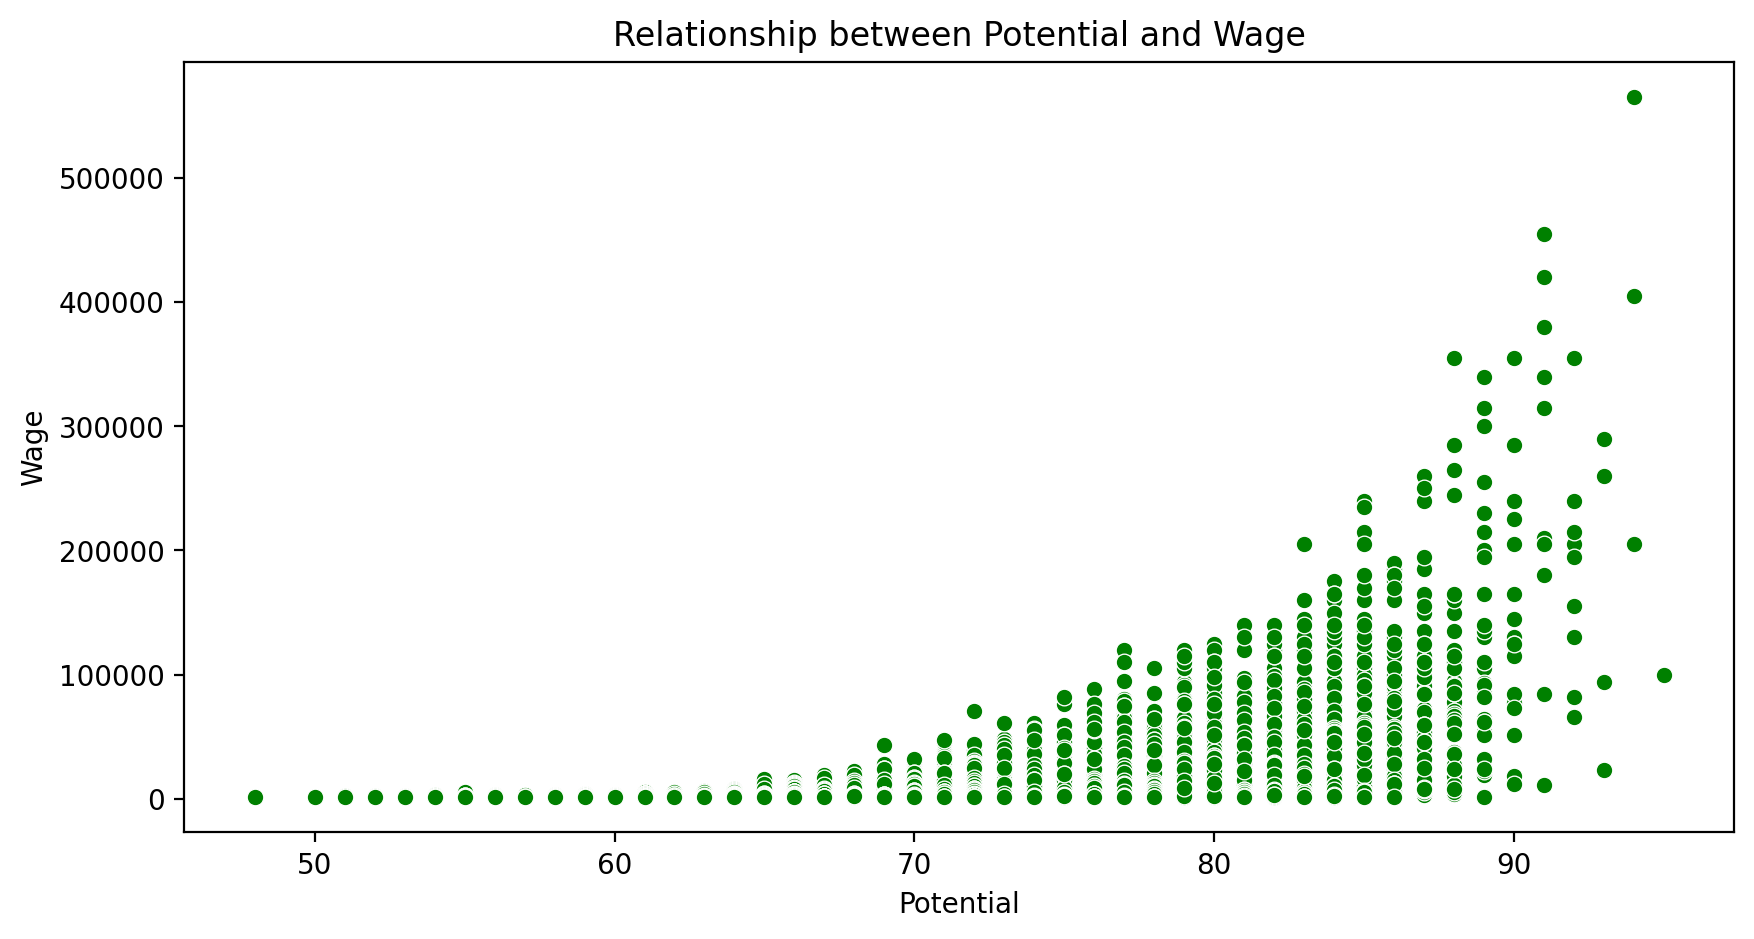

In [68]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(x=df["Potential"], y=df["Wage"],color="green")
plt.title("Relationship between Potential and Wage")
plt.xlabel("Potential")
plt.ylabel("Wage")
plt.show()

* This shows how player potential related to their wage.We can see that as potential increases on x axis,wage on y axis also tends to increase. The correlation coeffecient of 0.49 indicates a moderate +ve relationship the player with higher potential are generally paid more. But, the wide spread of the point at higher potential levels shows that wages also depends on other factor like experience or club reputation.

In [62]:
df.groupby(["Potential","Name"])["Wage"].max()

Potential  Name             
48         K. Pilkington          1000.0
           Y. Uchimura            1000.0
50         A. Suzuki              1000.0
           J. Miszczuk            1000.0
51         Teng Shangkun          1000.0
                                  ...   
93         Neymar Jr            290000.0
94         Cristiano Ronaldo    405000.0
           L. Messi             565000.0
           P. Dybala            205000.0
95         K. Mbappé            100000.0
Name: Wage, Length: 18147, dtype: float64

## Q8 Age Distribution by Position
* How does player age vary across different positions (e.g., GK, ST, CM)? Analyze the distribution of Age by Position and identify any positions with notably older or younger players. What might explain these differences?

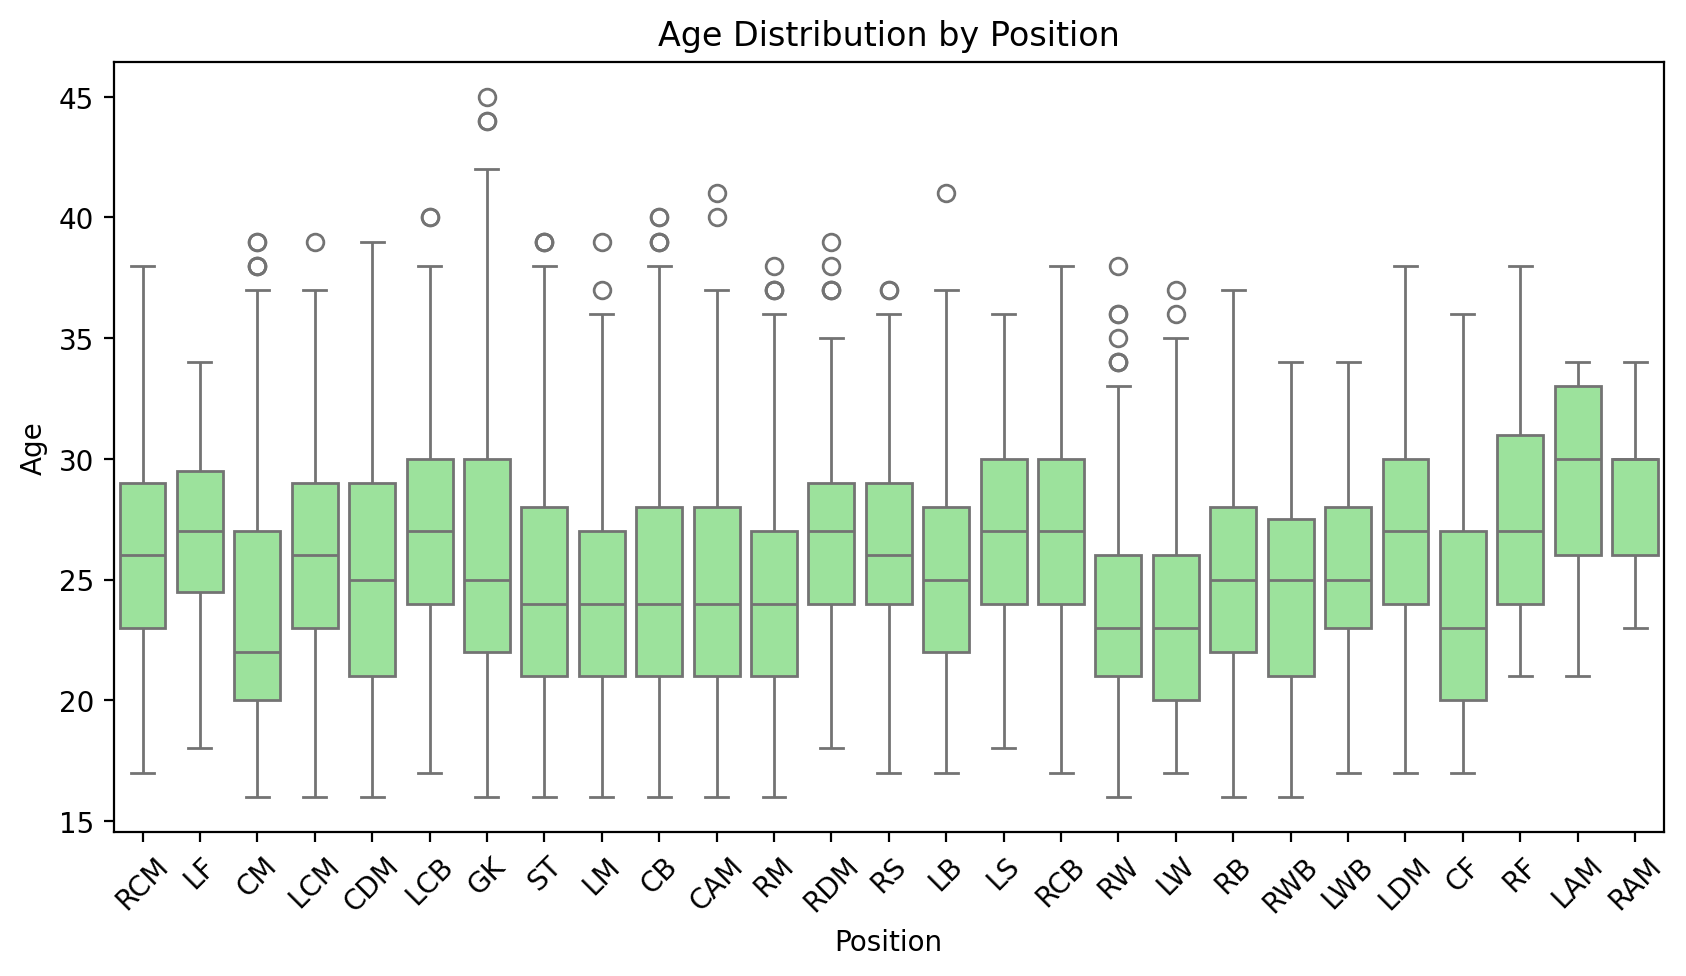

In [99]:
plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(data=df,x="Position", y="Age",color="lightgreen")
plt.title("Age Distribution by Position")
plt.xticks(rotation=45)
plt.show()

* This boxplot shows how player age vary across diferent position. We can see the most player fall between 23 and 30 years old, with the median age around 26.Goalkeeper and defenders tends to be slightly older, refelecting the value of experience in those positions while forward and winger are generally younger because of speed and stamina peak earlier.The dot above the boxplot represents outliers player who have extended their career.

In [38]:
df.groupby("Position")["Age"].agg(["min","max","mean","median","count"])

,min,max,mean,median,count
Position,,,,,
CAM,16,41,24.580376,24.0,958
CB,16,40,24.818335,24.0,1778
CDM,16,39,25.235232,25.0,948
CF,17,36,23.513514,23.0,74
CM,16,39,23.481349,22.0,1394
GK,16,45,26.043457,25.0,2025
LAM,21,34,29.333333,30.0,21
LB,17,41,25.085477,25.0,1322
LCB,17,40,27.052469,27.0,648


| **Forward / Attacking**       | **Attacking Midfield**             | **Central / Wide Midfield**    | **Defensive Midfield**             | **Wing      Back**         | **Defense**             |
| ----------------------------- | ---------------------------------- | ------------------------------ | ---------------------------------- | --------------------- | ----------------------- |
| LS – Left Striker             | LAM – Left Attacking Midfielder    | LM – Left Midfielder           | LDM – Left Defensive Midfielder    | LWB – Left Wing Back  | LB – Left Back          |
| ST – Striker (Center Forward) | CAM – Central Attacking Midfielder | LCM – Left Central Midfielder  | CDM – Central Defensive Midfielder |                       | LCB – Left Centre Back  |
| RS – Right Striker            | RAM – Right Attacking Midfielder   | CM – Central Midfielder        | RDM – Right Defensive Midfielder   | RWB – Right Wing Back | CB – Centre Back        |
| LW – Left Winger              |                                    | RCM – Right Central Midfielder |                                    |                       | RCB – Right Centre Back |
| LF – Left Forward             |                                    | RM – Right Midfielder          |                                    |                       | RB – Right Back         |
| CF – Centre Forward           |                                    |                                |                                    |                       |                         |
| RF – Right Forward            |                                    |                                |                                    |                       |                         |
| RW – Right Winger             |                                    |                                |                                    |                       |                         |


## Q9 Nationality Representation
* Which nationalities are most represented in the dataset? Analyze the distribution of players by Nationality and identify the top 10 countries. What insights can this provide about global football talent distribution?

In [11]:
nationality_counts=df["Nationality"].value_counts()
nationality_counts

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Ethiopia          1
Oman              1
Puerto Rico       1
Palestine         1
Qatar             1
Name: count, Length: 164, dtype: int64

In [12]:
top10_nationalities = nationality_counts.head(10)
top10_nationalities

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

C:\Users\richa\AppData\Local\Temp\ipykernel_28392\4024250349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top10_nationalities,palette="coolwarm")


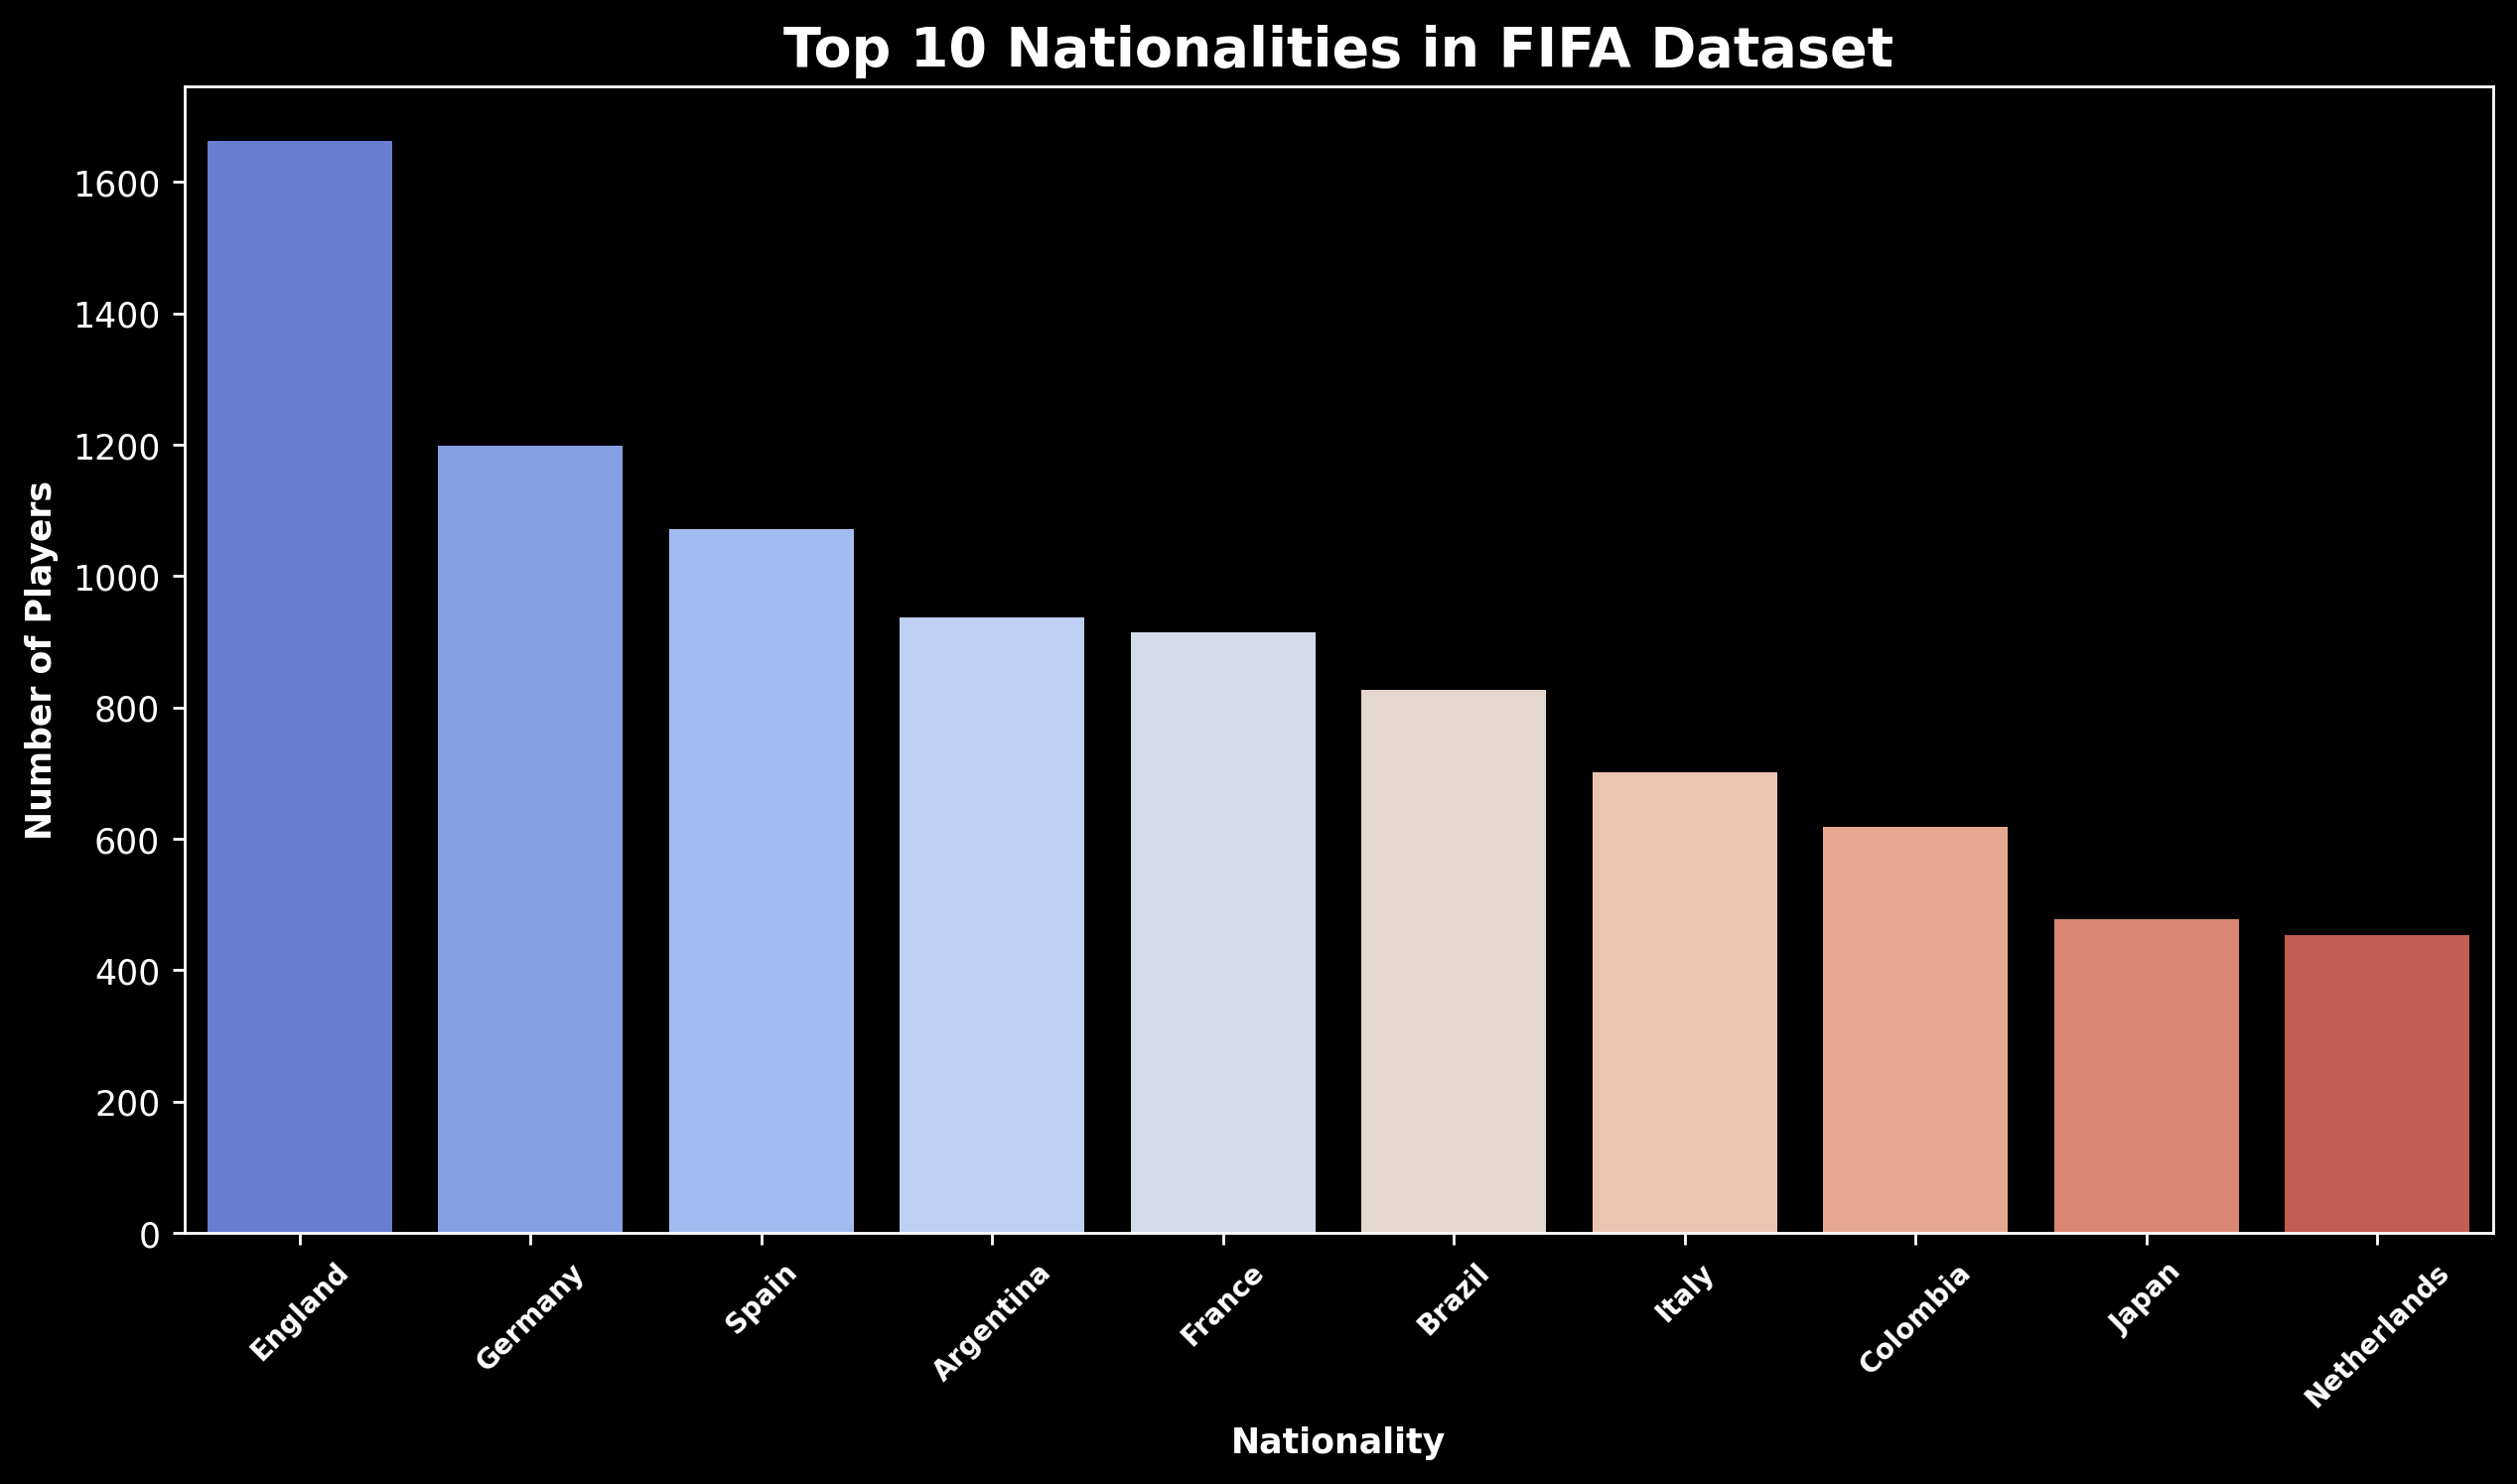

In [21]:
plt.figure(figsize=(12,6),dpi=250)
sns.barplot(top10_nationalities,palette="coolwarm")
plt.xticks(rotation=45,fontsize=8, weight="bold")
plt.xlabel("Nationality",fontsize=10, weight="bold")
plt.ylabel("Number of Players",fontsize=10, weight="bold")
plt.title("Top 10 Nationalities in FIFA Dataset",fontsize=16, weight="bold")
plt.style.use("dark_background")
plt.show()

## Q10 Skill Metrics and Performance
* How do key skill metrics (e.g., Dribbling, Finishing, Passing) correlate with Overall and Potential ratings? Identify which skills have the strongest influence on player performance ratings and visualize these relationships.

In [23]:
skills=df [["Dribbling","Curve","FKAccuracy","LongPassing","BallControl","Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","ShotPower","LongShots","Penalties"]]
Performance = df[["Overall", "Potential"]]
combine_sp=skills.join(Performance)
combine_sp

,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,ShotPower,LongShots,Penalties,Overall,Potential
0,69.0,79.0,79.0,71.0,71.0,68.0,64.0,61.0,76.0,68.0,75.0,71.0,75.0,71,71
1,90.0,80.0,70.0,85.0,92.0,77.0,70.0,54.0,90.0,74.0,65.0,71.0,71.0,86,86
2,78.0,83.0,80.0,87.0,82.0,80.0,68.0,43.0,86.0,69.0,77.0,76.0,85.0,79,79
3,66.0,58.0,54.0,64.0,67.0,63.0,53.0,62.0,69.0,61.0,71.0,65.0,65.0,70,70
4,62.0,68.0,67.0,68.0,68.0,64.0,59.0,58.0,72.0,57.0,70.0,66.0,66.0,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,59.0,45.0,42.0,58.0,58.0,50.0,48.0,55.0,60.0,35.0,56.0,44.0,55.0,57,72
18203,66.0,50.0,32.0,39.0,63.0,66.0,65.0,51.0,54.0,53.0,63.0,52.0,60.0,62,77
18204,25.0,29.0,24.0,55.0,53.0,39.0,29.0,61.0,60.0,30.0,42.0,31.0,41.0,58,69
18205,63.0,63.0,70.0,60.0,66.0,58.0,55.0,31.0,65.0,52.0,63.0,64.0,60.0,62,76


In [25]:
corr = combine_sp.corr()
correlate = corr[["Overall", "Potential"]]
correlate

,Overall,Potential
Dribbling,0.372426,0.315019
Curve,0.419491,0.279944
FKAccuracy,0.396892,0.230544
LongPassing,0.483909,0.321437
BallControl,0.460197,0.354396
Crossing,0.394972,0.246319
Finishing,0.332515,0.243355
HeadingAccuracy,0.340776,0.200988
ShortPassing,0.502550,0.369189
Volleys,0.391338,0.254906


| **Correlation Coefficient (r)** | **Strength of Relationship** | **Interpretation**                   |
| :-----------------------------: | :--------------------------- | :----------------------------------- |
|        **0.00 to ±0.19**        | Very Weak / No correlation   | No linear relationship               |
|        **±0.20 to ±0.39**       | Weak correlation             | Small relationship (some connection) |
|        **±0.40 to ±0.59**       | Moderate correlation         | Noticeable relationship              |
|        **±0.60 to ±0.79**       | Strong correlation           | High association between variables   |
|        **±0.80 to ±1.00**       | Very Strong correlation      | Almost perfect linear relationship   |


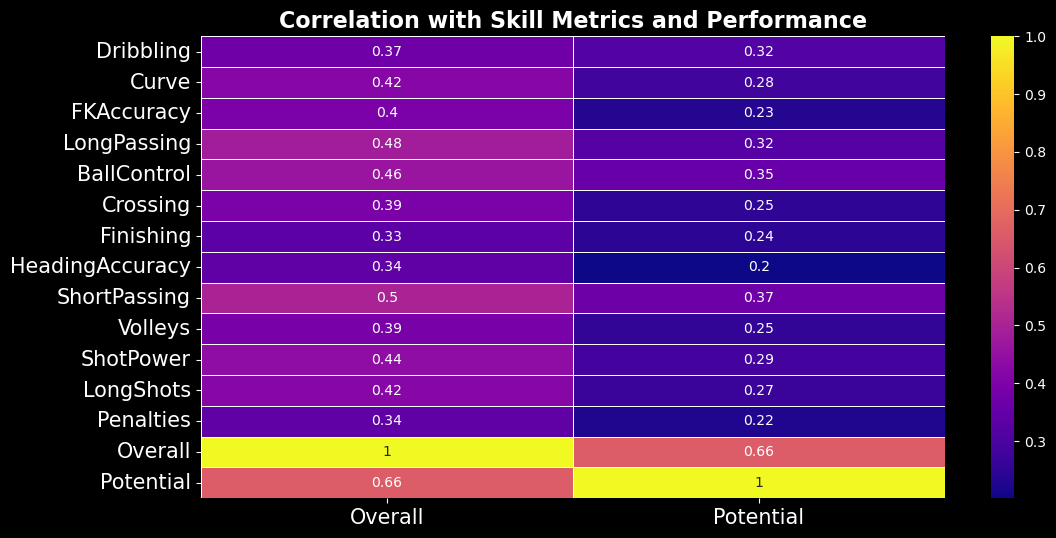

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(correlate,cmap="plasma",linewidths=0.5,linecolor="white",annot=True)
plt.title("Correlation with Skill Metrics and Performance", fontsize=16, weight="bold")
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.style.use("dark_background")
plt.show()

* This heatmap shows how different skill metrics relate to player performance mesured through overall and potential rating .We can see that skills like short passing, ball control, and long passing have the strongest correlation with overall performance indicates the technical consistency heavily impact players ratings.Potential is strongly linked with Overall 0.66 showing that players performing well. Lower Correlation for attributes like finishing and heading Accuracy suggest those are more situational and less tied to general performance.

## ***Q11 Physical Attributes and Position***
* Do physical attributes like Weight and Height differ significantly across player positions? Perform statistical tests (e.g., ANOVA) to assess differences and visualize the results. What implications do these findings have for position-specific recruitment? 

ANOVA p-value for Height: 0.0


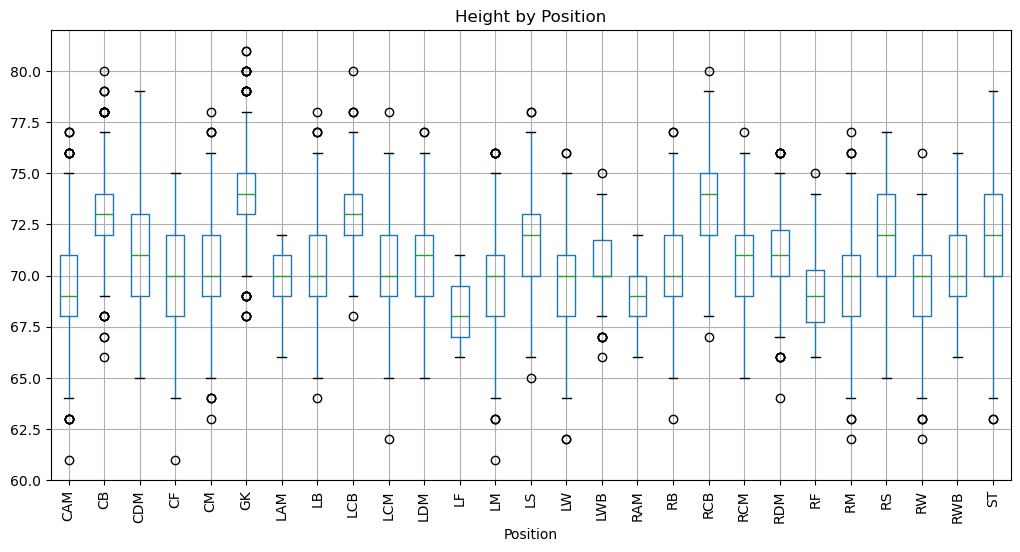

In [57]:
positions = df['Position'].unique()
height_groups = [df[df['Position'] == pos]['Height_inches'].dropna() for pos in positions if len(df[df['Position'] == pos]) > 1]
anova_height = stats.f_oneway(*height_groups)
print("ANOVA p-value for Height:", anova_height.pvalue)
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(column='Height_inches', by='Position', ax=ax, rot=90)
plt.title('Height by Position')
plt.suptitle('')
plt.show()

*Data Preparation:
Extract unique positions and create groups for Height (or Weight).
Remove NaNs to ensure clean data.
Concept Involved: Grouping and cleaning ensure comparable, error-free subsets. Without this, ANOVA could fail or bias results.
Perform Statistical Test (ANOVA):
Run one-way ANOVA on grouped data.
Output p-value to decide significance.
Concept Involved: Hypothesis testing via ANOVA checks if variances between positions explain differences better than random variation. If p < 0.05, positions significantly affect Height/Weight.
Visualize the Data:
Create a boxplot grouped by Position.
Customize for readability (size, rotation, titles).
Concept Involved: Boxplots reveal distributions, medians, and outliers, complementing ANOVA by showing how groups differ (e.g., GK box higher than others).
Repeat for Other Attributes:
Apply the same to Weight (code comment indicates this).
Concept Involved: Comparative analysis across metrics for holistic insights (e.g., Height differences may be more pronounced than Weight).
Interpret Results:
If significant (low p-value), positions influence physical traits.
Implications: For recruitment, tailor scouts to position needs (e.g., taller GKs for aerial dominance; lighter wingers for agility).
Concept Involved: Statistical significance vs. practical importance—e.g., even if p < 0.05, small differences may not matter; check effect size.*

## Q12 Wage Distribution by Club
* How does the Wage distribution vary across different clubs? Identify clubs with the highest and lowest average wages and explore whether these align with player Potential or Overall ratings. Use visualizations to support the analysis.

In [266]:
club_wage = df.groupby("Club")["Wage"].mean().sort_values(ascending=False)
top_10_clubs = club_wage.head(10)
bottom_10_clubs = club_wage.tail(10)

C:\Users\richa\AppData\Local\Temp\ipykernel_24392\3602750387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_clubs.values, y=top_10_clubs.index, palette="coolwarm")


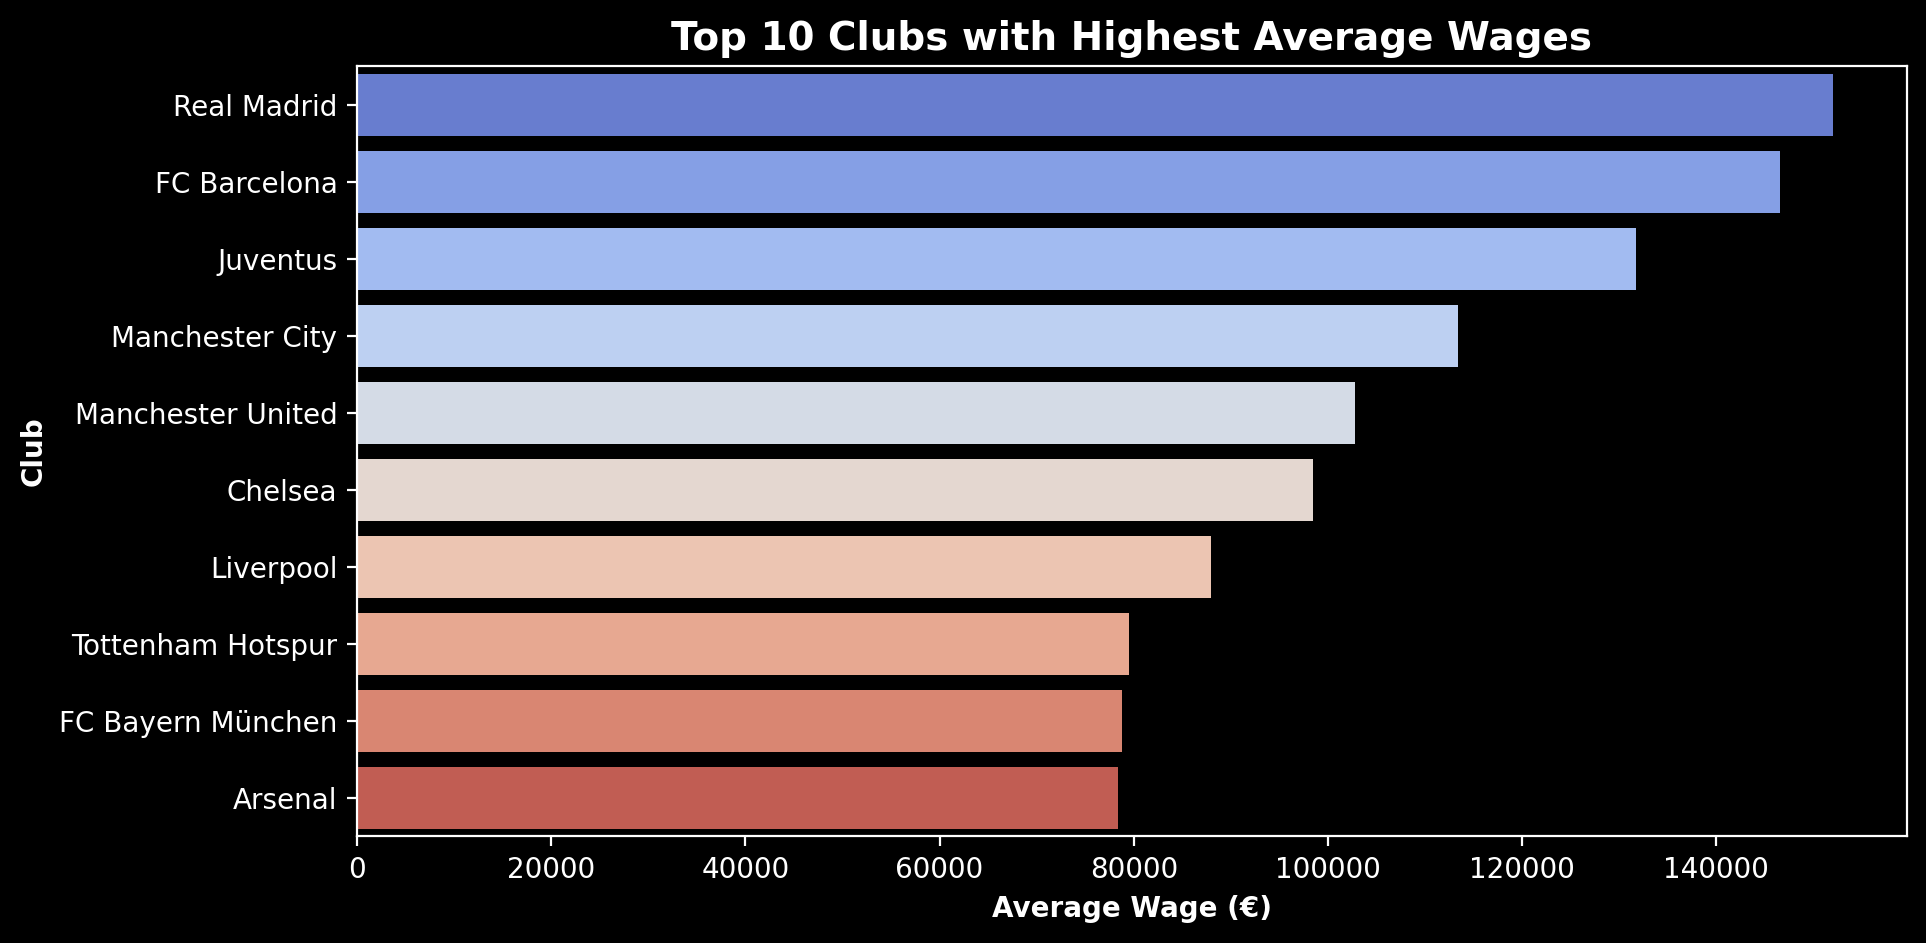

In [274]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=top_10_clubs.values, y=top_10_clubs.index, palette="coolwarm")
plt.title("Top 10 Clubs with Highest Average Wages", fontsize=14, weight="bold")
plt.xlabel("Average Wage (€)", fontsize=10, weight="bold")
plt.ylabel("Club", fontsize=10, weight="bold")
plt.style.use("dark_background")
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_24392\2110336267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_clubs.values, y=bottom_10_clubs.index, palette="coolwarm")


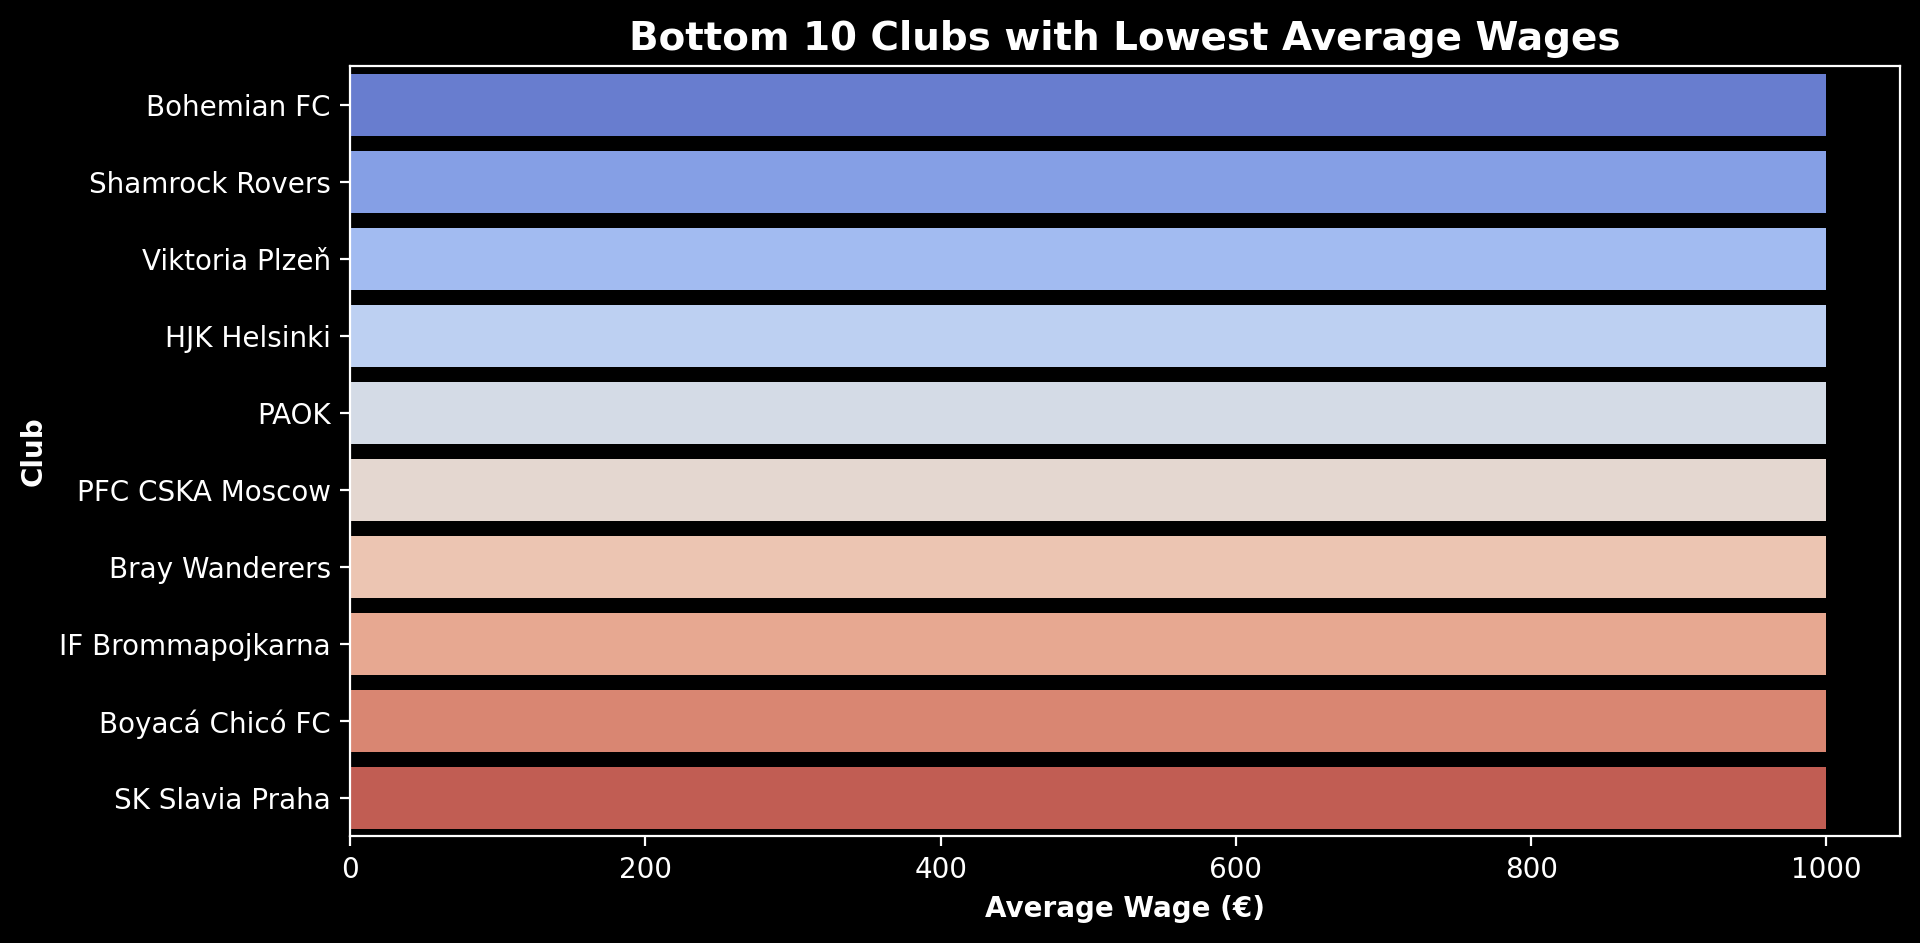

In [286]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=bottom_10_clubs.values, y=bottom_10_clubs.index, palette="coolwarm")
plt.title("Bottom 10 Clubs with Lowest Average Wages", fontsize=14, weight="bold")
plt.xlabel("Average Wage (€)", fontsize=10, weight="bold")
plt.ylabel("Club", fontsize=10, weight="bold")
plt.style.use("dark_background")
plt.show()

In [296]:
cor_wop=df[['Wage','Overall','Potential']].corr()

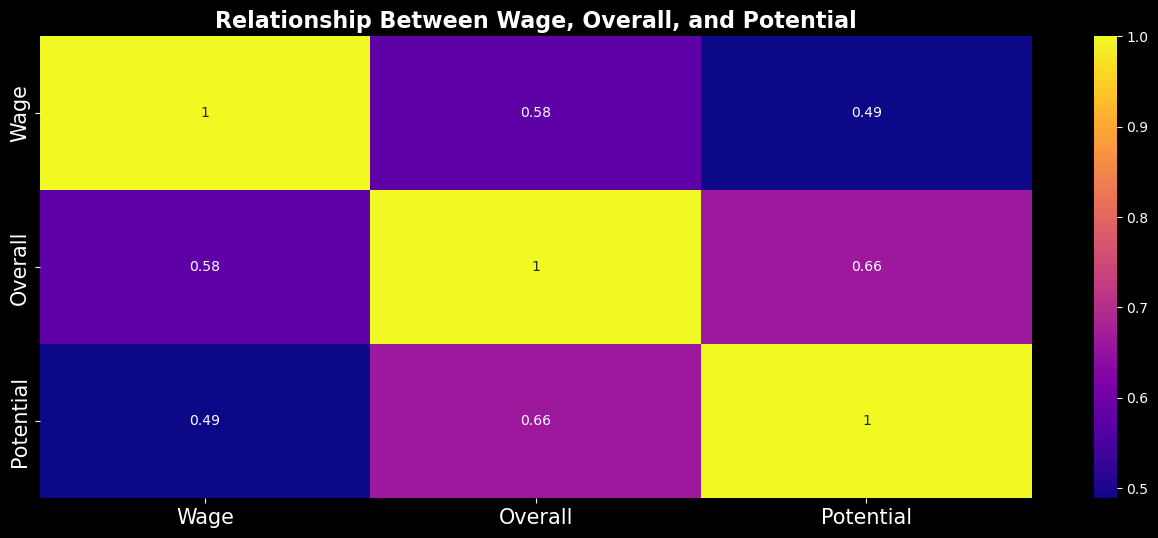

In [308]:
plt.figure(figsize=(16,6))
sns.heatmap(cor_wop,cmap="plasma",annot=True)
plt.title("Relationship Between Wage, Overall, and Potential", fontsize=16, weight="bold")
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.style.use("dark_background")
plt.show()

* This heatmap shows how a player wage is related to their current performance and future potential. We can see the moderate +ve correlation of 0.58 between wage and overall indicate that better performing palyers tends to earn more.The correlation between wages and potential is slightly lower 0.49 indicating that potential also doesn't guarantee high pay. Finally, the strongest correlation 0.66 is between overall and postential conferming high performing players often have strong future prospects as well.

## Q13 Potential Growth Analysis
* Calculate the potential growth (Potential - Overall) for each player. Analyze the distribution of potential growth and identify which age groups or positions have the highest growth potential. What does this suggest for talent scouting?


In [33]:
df["potential_growth"]=df["Potential"]-df["Overall"]
df["potential_growth"]

0         0
1         0
2         0
3         0
4         0
         ..
18202    15
18203    15
18204    11
18205    14
18206    23
Name: potential_growth, Length: 18207, dtype: int64

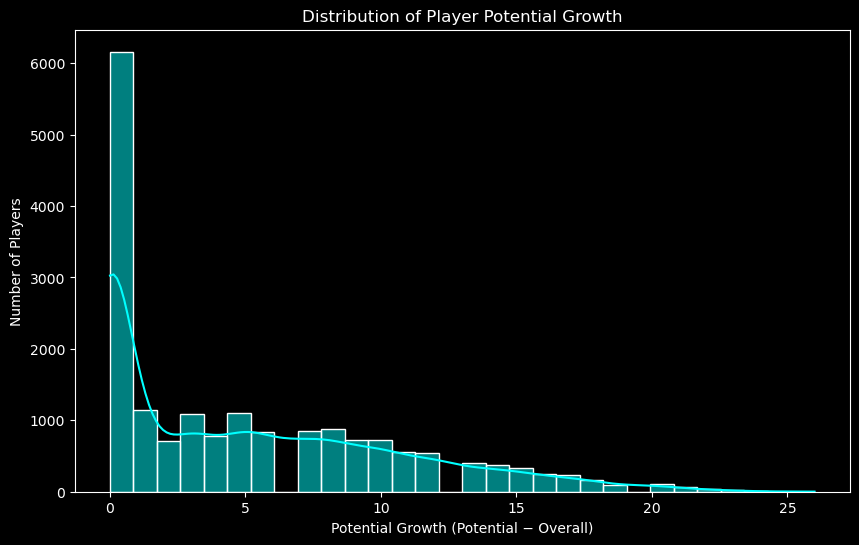

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df["potential_growth"], bins=30, kde=True, color="cyan")
plt.title("Distribution of Player Potential Growth")
plt.xlabel("Potential Growth (Potential − Overall)")
plt.ylabel("Number of Players")
plt.style.use("dark_background")
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_24392\3617453079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_growth.index, y=age_growth.values, palette="coolwarm")


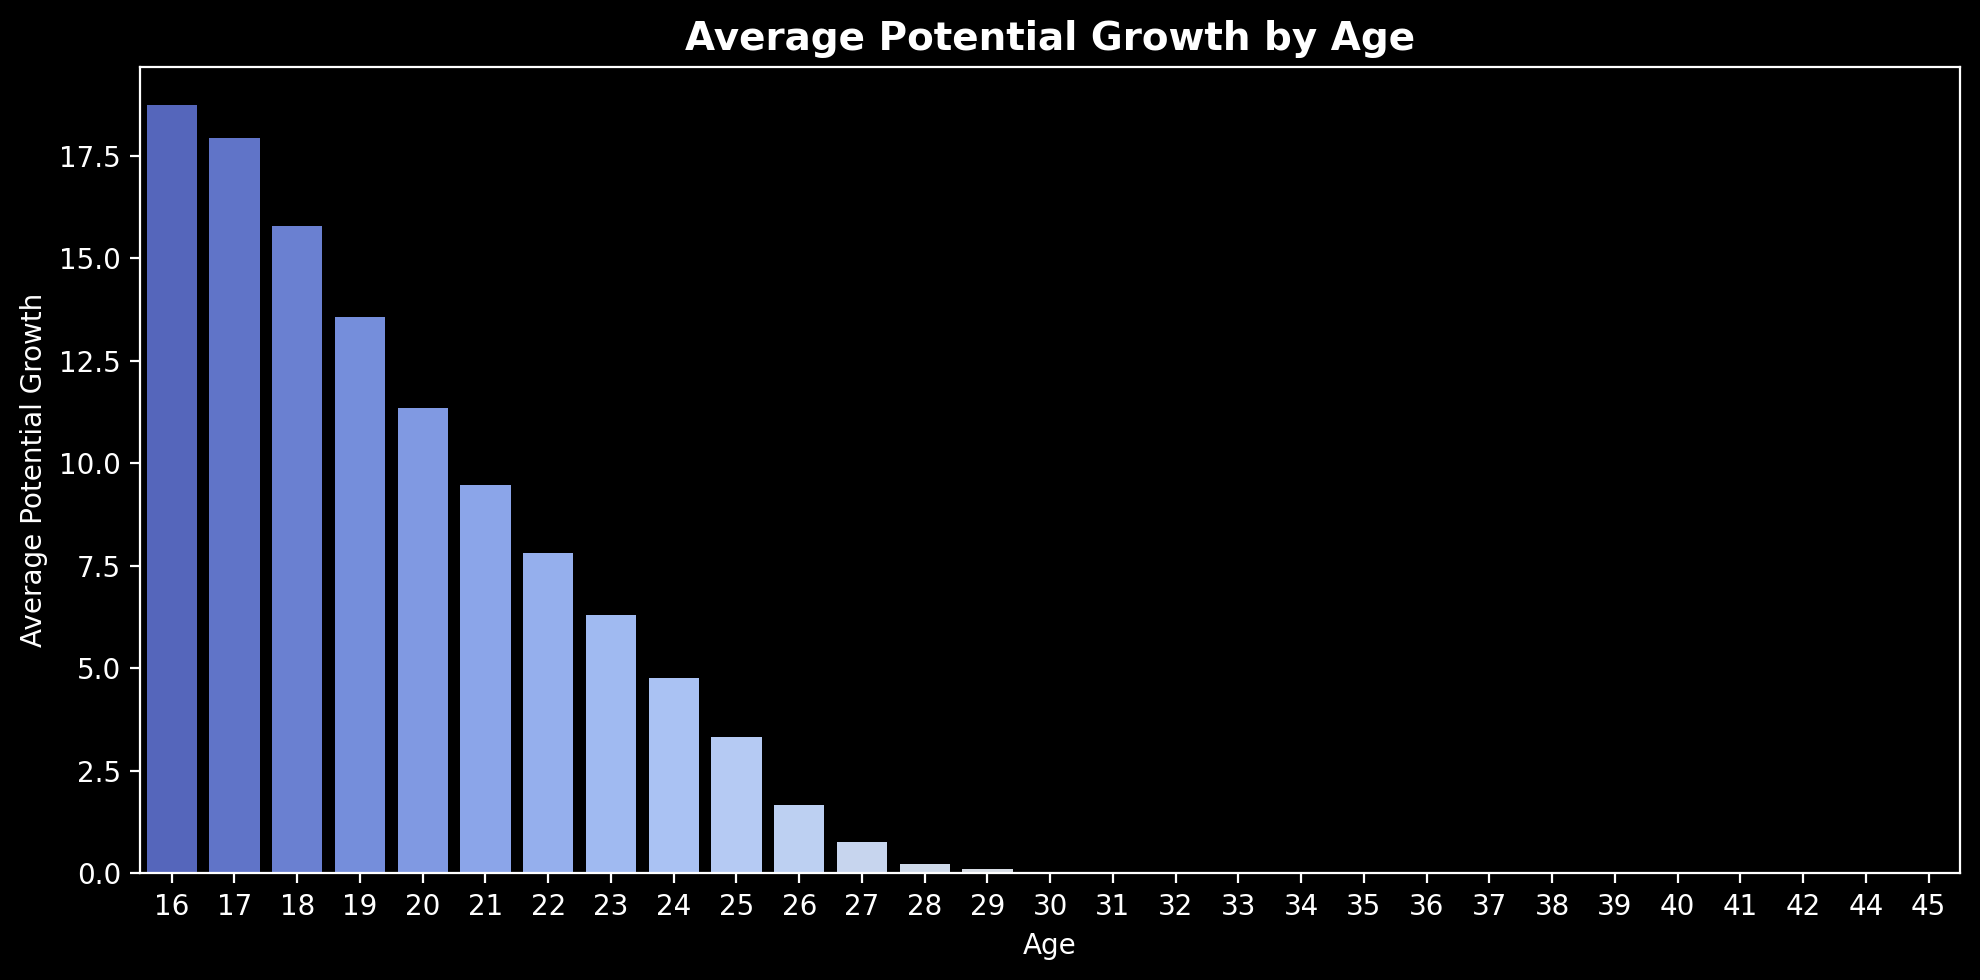

In [324]:
age_growth = df.groupby("Age")["potential_growth"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=age_growth.index, y=age_growth.values, palette="coolwarm")
plt.title("Average Potential Growth by Age", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Average Potential Growth")
plt.style.use("dark_background")
plt.show()

C:\Users\richa\AppData\Local\Temp\ipykernel_24392\2235191698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_growth.values, y=position_growth.index, palette="plasma")


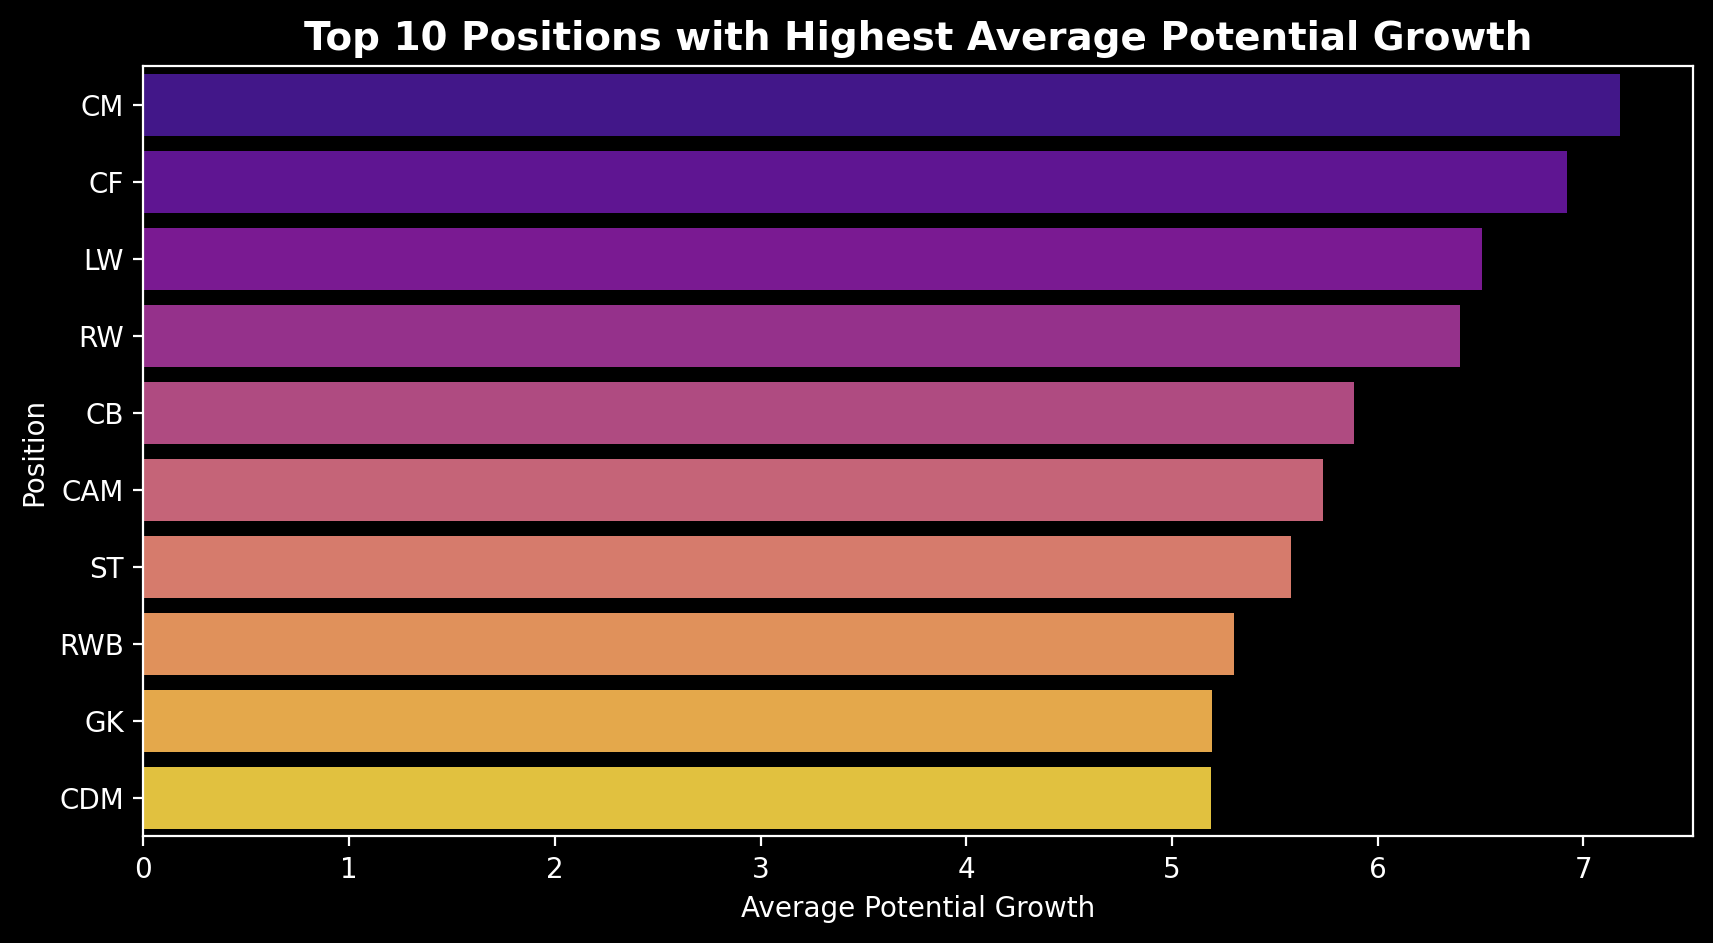

In [330]:
position_growth = df.groupby("Position")["potential_growth"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=position_growth.values, y=position_growth.index, palette="plasma")
plt.title("Top 10 Positions with Highest Average Potential Growth", fontsize=14, weight="bold")
plt.xlabel("Average Potential Growth")
plt.ylabel("Position")
plt.show()

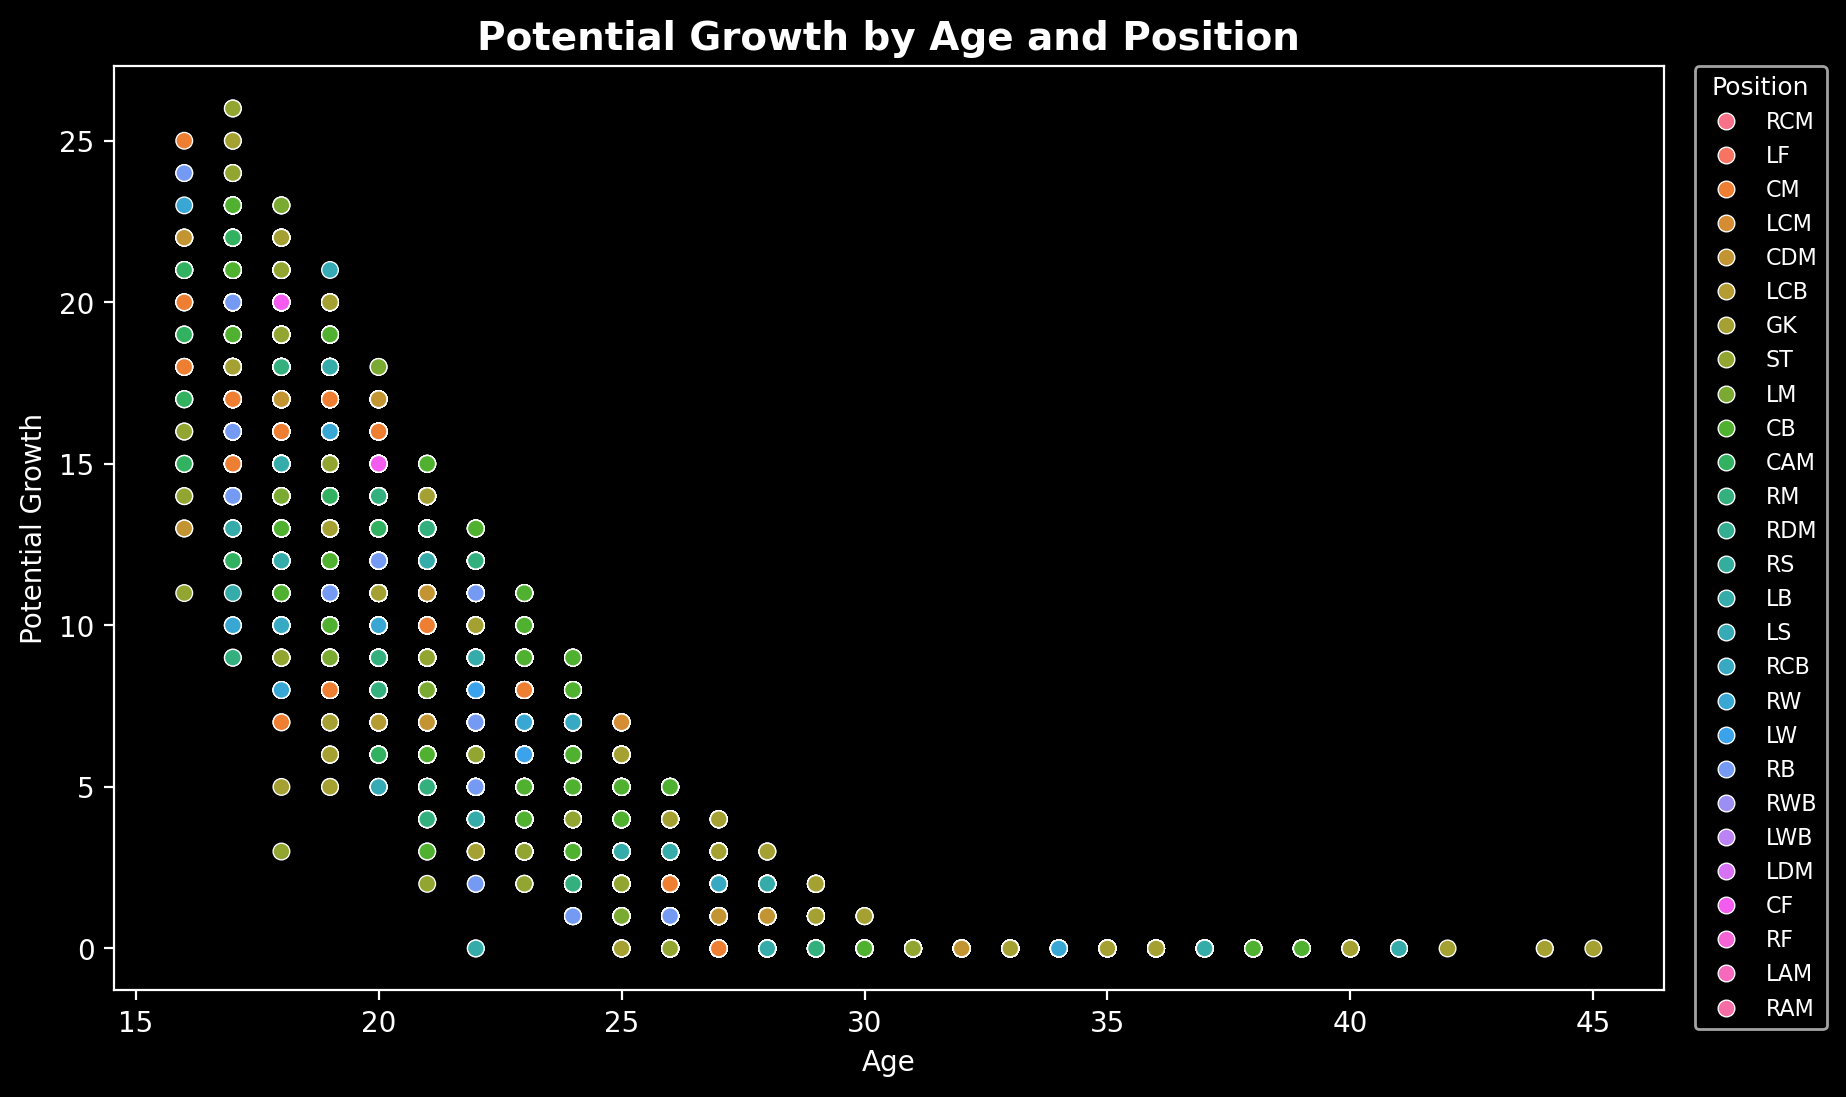

In [119]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x="Age", y="potential_growth",hue="Position")
plt.title("Potential Growth by Age and Position", fontsize=14, weight='bold')
plt.xlabel("Age")
plt.ylabel("Potential Growth")
plt.legend(title="Position",bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0,frameon=True,fontsize=8,title_fontsize=9)
#bbox_to_anchor=(0.5, -0.2): This parameter specifies the coordinates of the legend's bounding box. The values are relative to the figure. (0.5, -0.2) places the legend's anchor point horizontally in the middle (0.5) and vertically below the plot area (-0.2).
#loc='upper center': This aligns the top-center of the legend's bounding box with the coordinates specified by bbox_to_anchor.
#ncol=4: This organizes the legend into 4 columns, which helps save space and makes it fit better.
plt.show()

* This scatter plot shows the relationship between player age and potential growth across different positions.
We can clearly observe that younger players, especially between 16 to 21 years, tend to have a much higher potential growth compared to older players.
As players age, particularly after 25, their potential growth declines and eventually stabilizes close to zero.
This trend is common across all positions, though midfielders and forwards generally show slightly higher growth potential than defenders and goalkeepers.”
“Younger players show greater potential growth; after age 25, improvement slows dramatically. Midfielders and forwards exhibit higher growth trends.”

## ***Q14 Hypothesis Testing: Wage and International Reputation***
* Test the hypothesis that players with higher International Reputation have significantly higher Wages. Use an appropriate statistical test (e.g., t-test or ANOVA) and interpret the results. What does this imply about the value of reputation in football?

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA p-value: nan


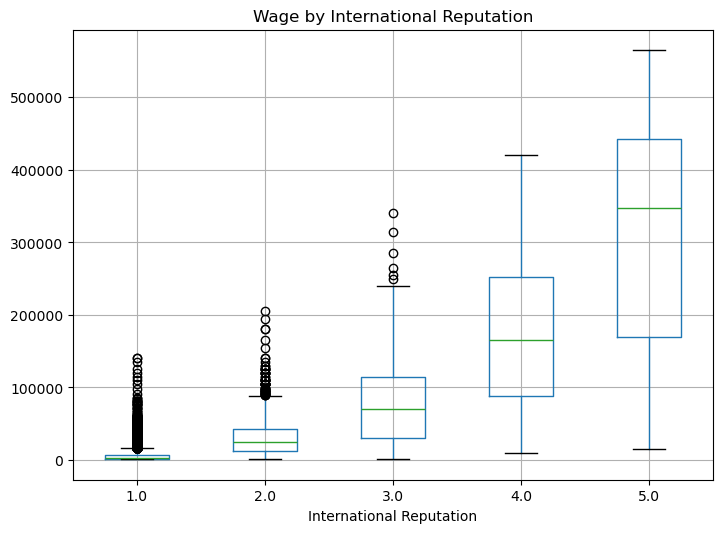

In [48]:
reputation_levels = df['International Reputation'].unique()
wage_groups = [df[df['International Reputation'] == rep]['Wage'].dropna() for rep in reputation_levels]
anova = stats.f_oneway(*wage_groups)
print("ANOVA p-value:", anova.pvalue)
fig, ax = plt.subplots(figsize=(8, 6))
df.boxplot(column='Wage', by='International Reputation', ax=ax)
plt.title('Wage by International Reputation')
plt.suptitle('')
plt.show()

*Define Hypotheses:
H0: Mean wages are equal across all international reputation levels.
H1: At least one level has a different mean wage.
Concept: Hypothesis Testing. Sets the stage for ANOVA to evaluate whether reputation impacts wages significantly.
Prepare Data for Analysis:
Identify unique reputation levels (1–5).
Create groups of wage data for each level, removing NaNs to ensure clean data.
Concept: Categorical Grouping and Data Cleaning. Ensures valid, complete data for ANOVA, avoiding errors from missing values.
Perform ANOVA Test:
Run one-way ANOVA to compare wage means across reputation levels.
Extract the p-value to determine significance (p < 0.05 → reject H0).
Concept: ANOVA. Tests if group differences are statistically significant, accounting for multiple comparisons efficiently.
Visualize Wage Distributions:
Create a boxplot of wages grouped by reputation level.
Customize for readability (e.g., remove redundant titles, adjust figure size).
Concept: Boxplot Visualization. Shows the spread, central tendency, and outliers, making differences intuitive (e.g., higher reputation → higher wages).
Interpret Results:
If p < 0.05, conclude reputation significantly affects wages.
Discuss implications: High-reputation players command higher wages, reflecting branding or marketability.
Concept: Practical Implications. Links statistical findings to real-world decisions, like salary negotiations or marketing strategies.*